<a href="https://colab.research.google.com/github/DikshantPatel2210/Adult_Income_Prediction/blob/main/Adult_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

from sklearn.impute import SimpleImputer

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_transformer

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_csv("adult.csv")

In [3]:
df0.sample(5)

age         workclass  fnlwgt   education  education.num  \
20367   30  Self-emp-not-inc   31510  Assoc-acdm             12   
23486   55           Private  171242     HS-grad              9   
24750   50  Self-emp-not-inc   29231     HS-grad              9   
27624   32         State-gov  400132   Bachelors             13   
31672   26           Private  189185     HS-grad              9   

           marital.status       occupation   relationship   race     sex  \
20367            Divorced     Craft-repair  Not-in-family  White    Male   
23486            Divorced  Exec-managerial  Not-in-family  White    Male   
24750  Married-civ-spouse  Exec-managerial        Husband  White    Male   
27624  Married-civ-spouse  Protective-serv        Husband  White    Male   
31672            Divorced     Adm-clerical      Own-child  White  Female   

       capital.gain  capital.loss  hours.per.week native.country income  
20367             0             0              50  United-States  <=50K  
23486             0             0              60  United-States   >50K  
24750             0             0              45  United-States   >50K  
27624             0             0              40  United-States   >50K  
31672             0             0              40  United-States  <=50K

In [4]:
df = df0.copy()

In [5]:
df

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

In [6]:
df["income"].nunique()

2

In [7]:
df.shape

(32561, 15)

In [8]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [9]:
df.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

Exploratory Data Analysis(EDA)

In [10]:
df[df == "?"] = np.nan

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [13]:
df.duplicated().sum()

24

In [14]:
def duplicate_values(df):
  print("Duplicate Check...")
  num_duplicates = df.duplicated(subset = None, keep = "first").sum()
  if num_duplicates > 0:
    print("There are", num_duplicates, "duplicated obervations in the dataset.")
    df.drop_duplicates(keep = "first", inplace = True)
    print(num_duplicates, "duplicates were dropped!")
    print("No more duplicate rows")

  else:
    print("There are no duplicated obervations in the dataset")

In [15]:
duplicate_values(df)

Duplicate Check...
There are 24 duplicated obervations in the dataset.
24 duplicates were dropped!
No more duplicate rows


In [16]:
df.isnull().sum().sum()

4261

[Text(0, 0, '24698'), Text(0, 0, '7839')]

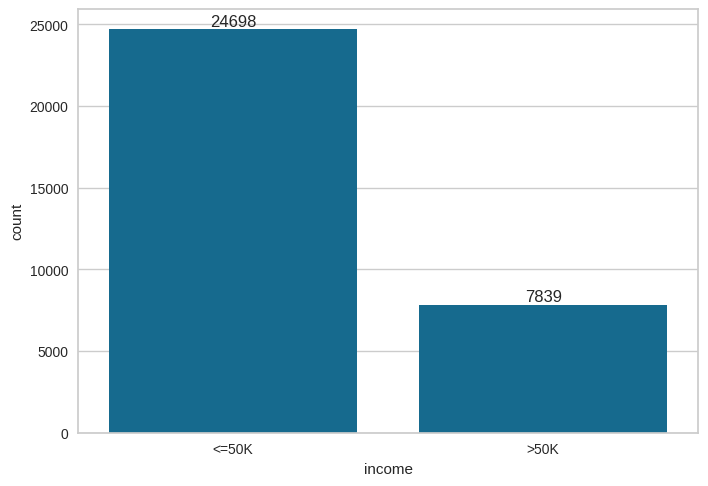

In [17]:
ax = sns.countplot( x = "income", data = df)
ax.bar_label(ax.containers[0])

Our data is unbalance data.

# **Features Summary**

In [18]:
!pip install ipywidgets ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title = "Profiling Report")
profile.to_file("profiling_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f52b5cc343e0b809930936be8bccfe7fb0290492227b369affdf428f2442b8f2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile

In [20]:
!pip install summarytools
from summarytools import dfSummary
dfSummary(df)

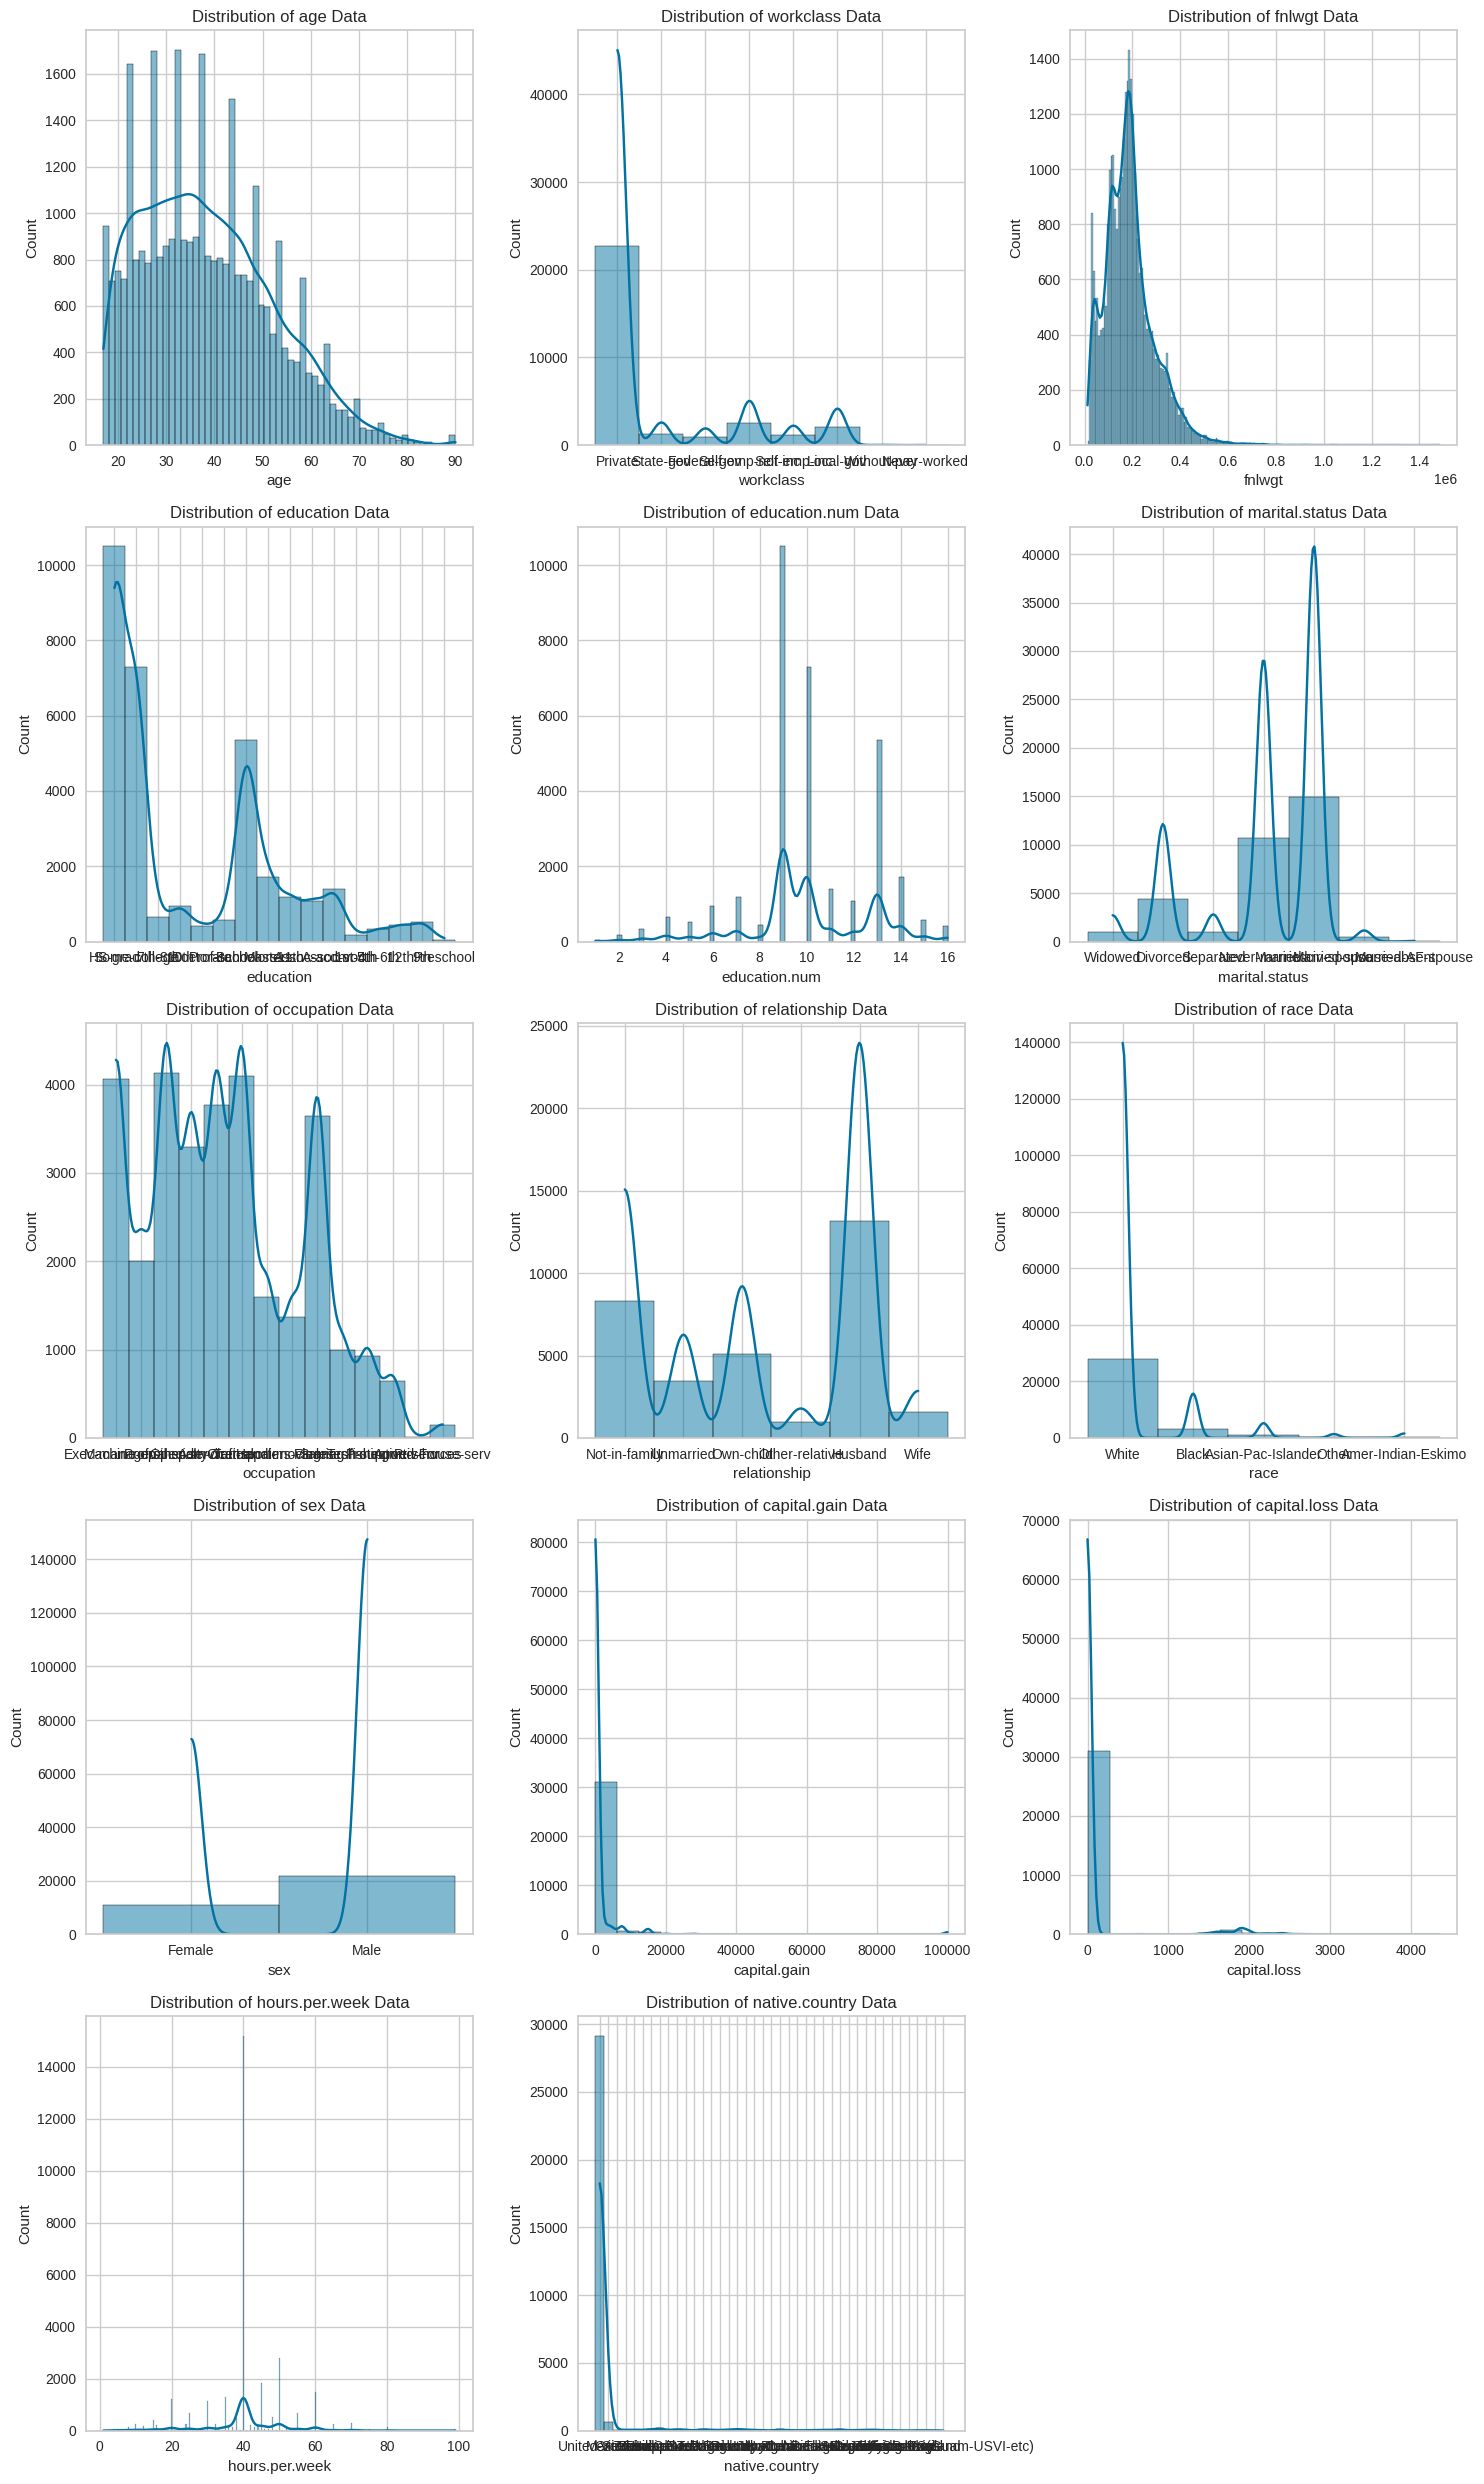

In [21]:
import math
num_cols = df.iloc[: , :-1].shape[1]
num_rows = math.ceil(num_cols/3)

plt.figure(figsize = (15,5*num_rows))
for i , col in enumerate(df.iloc[: ,:-1].columns,1):
  plt.subplot(num_rows,3,i)
  plt.title(f"Distribution of {col} Data")
  sns.histplot(df[col], kde = True)
  plt.tight_layout()
plt.show()

In [23]:
num_cols = df.select_dtypes("number").columns

skew_limits = 0.75          # define a limit above which we will log transforms
skew_vals = df[num_cols].skew()

#Showing the skewed columns
skew_cols = skew_vals.sort_values(ascending = False).to_frame().rename(columns = {0 : "Skew"}).query("Skew > {}".format(skew_limits))

In [24]:
skew_cols

Skew
capital.gain  11.949403
capital.loss   4.592702
fnlwgt         1.447703

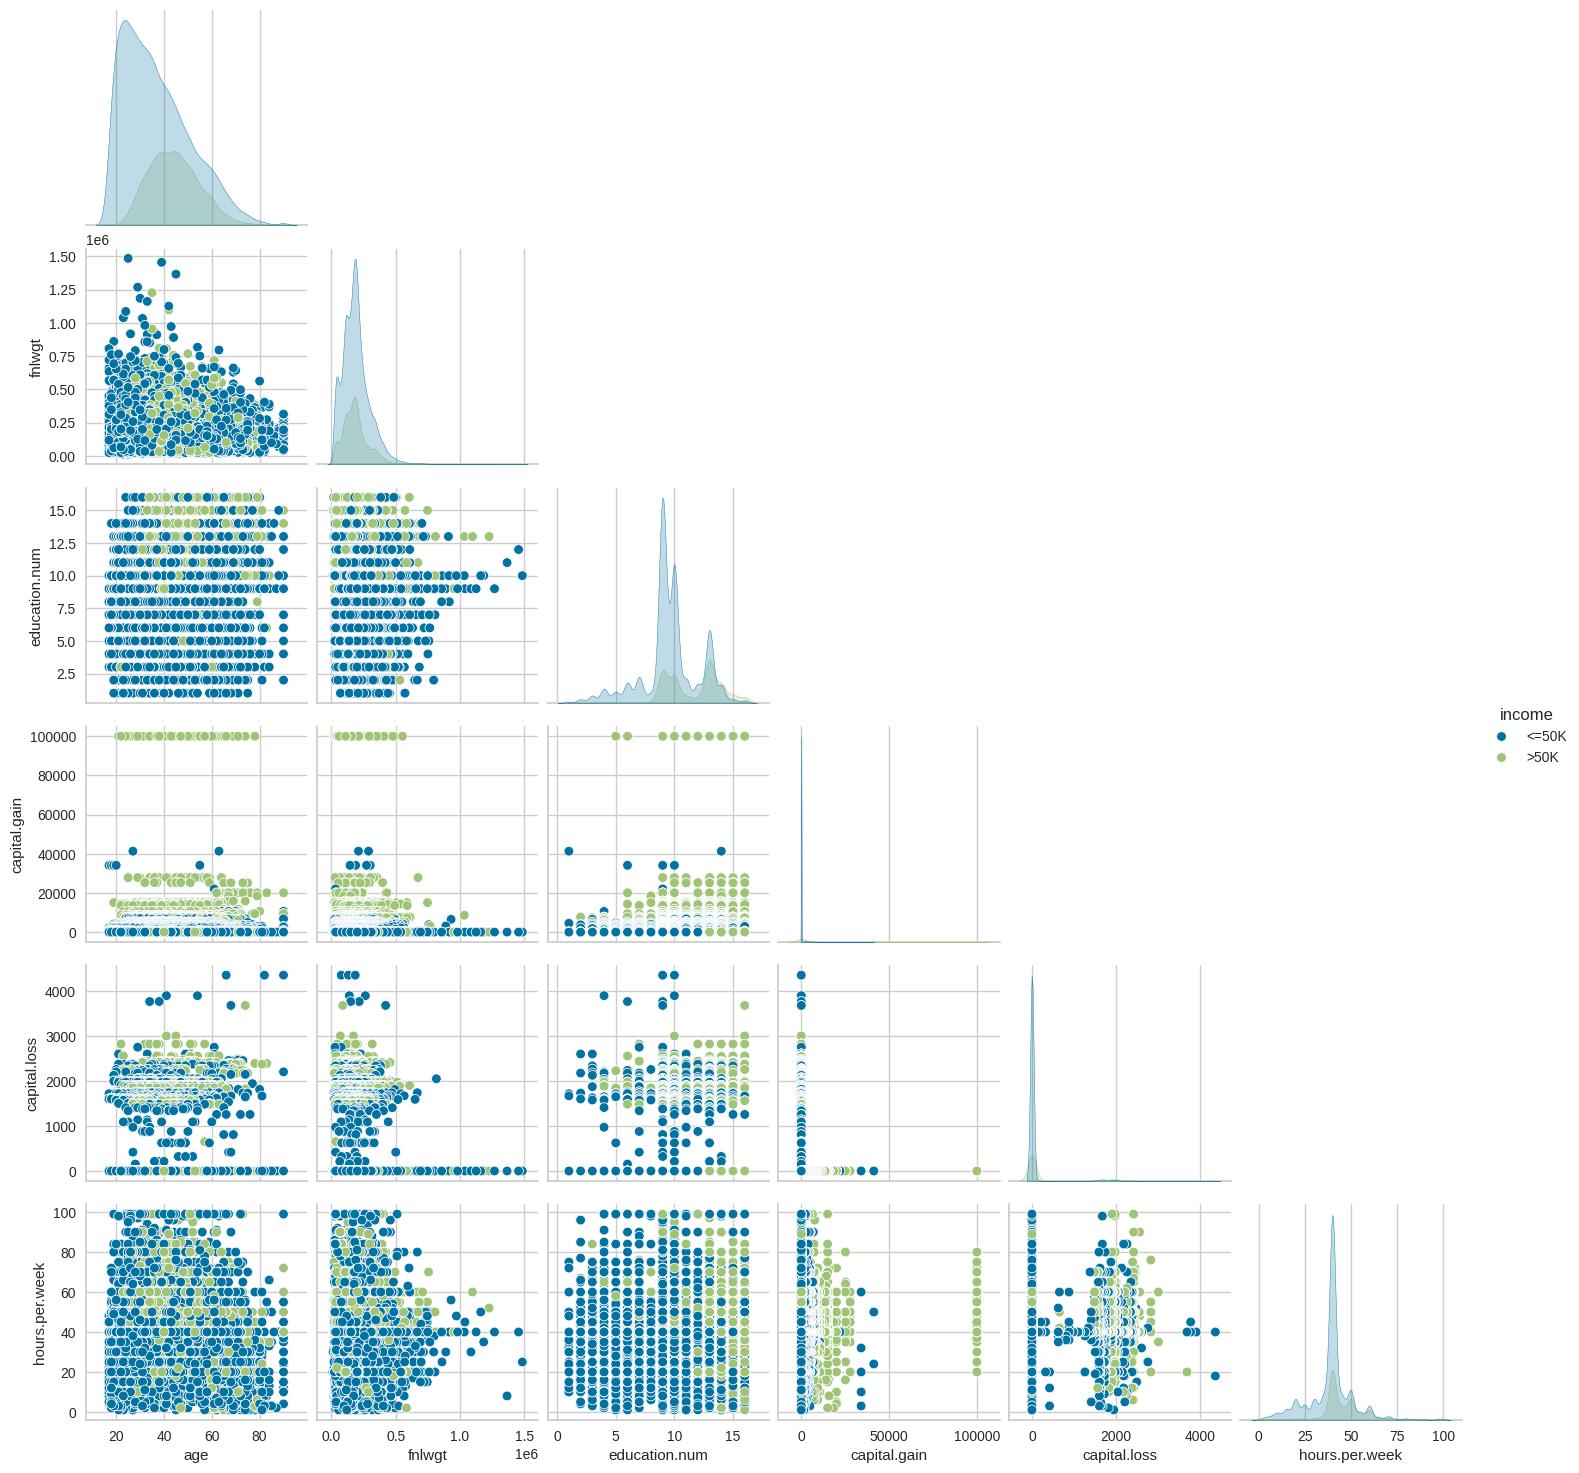

In [25]:
sns.pairplot(df , hue = "income" , corner = True)

In [27]:
cat_features = df.select_dtypes("object").columns.tolist()
cat_features = [col for col in cat_features if col != "income"]


In [28]:
cat_features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [29]:
num_features = df.select_dtypes("number").columns.tolist()

In [30]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)


In [31]:
df["income"].nunique()

2

# Handling Missing Values

In [32]:
missing_values = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_values / value_count *100 ,2)
missing_df = pd.DataFrame({"count": missing_values , "percentage": missing_percentage})
missing_df

count  percentage
age                 0        0.00
workclass        1836        5.64
fnlwgt              0        0.00
education           0        0.00
education.num       0        0.00
marital.status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital.gain        0        0.00
capital.loss        0        0.00
hours.per.week      0        0.00
native.country    582        1.79
income              0        0.00

<Axes: >

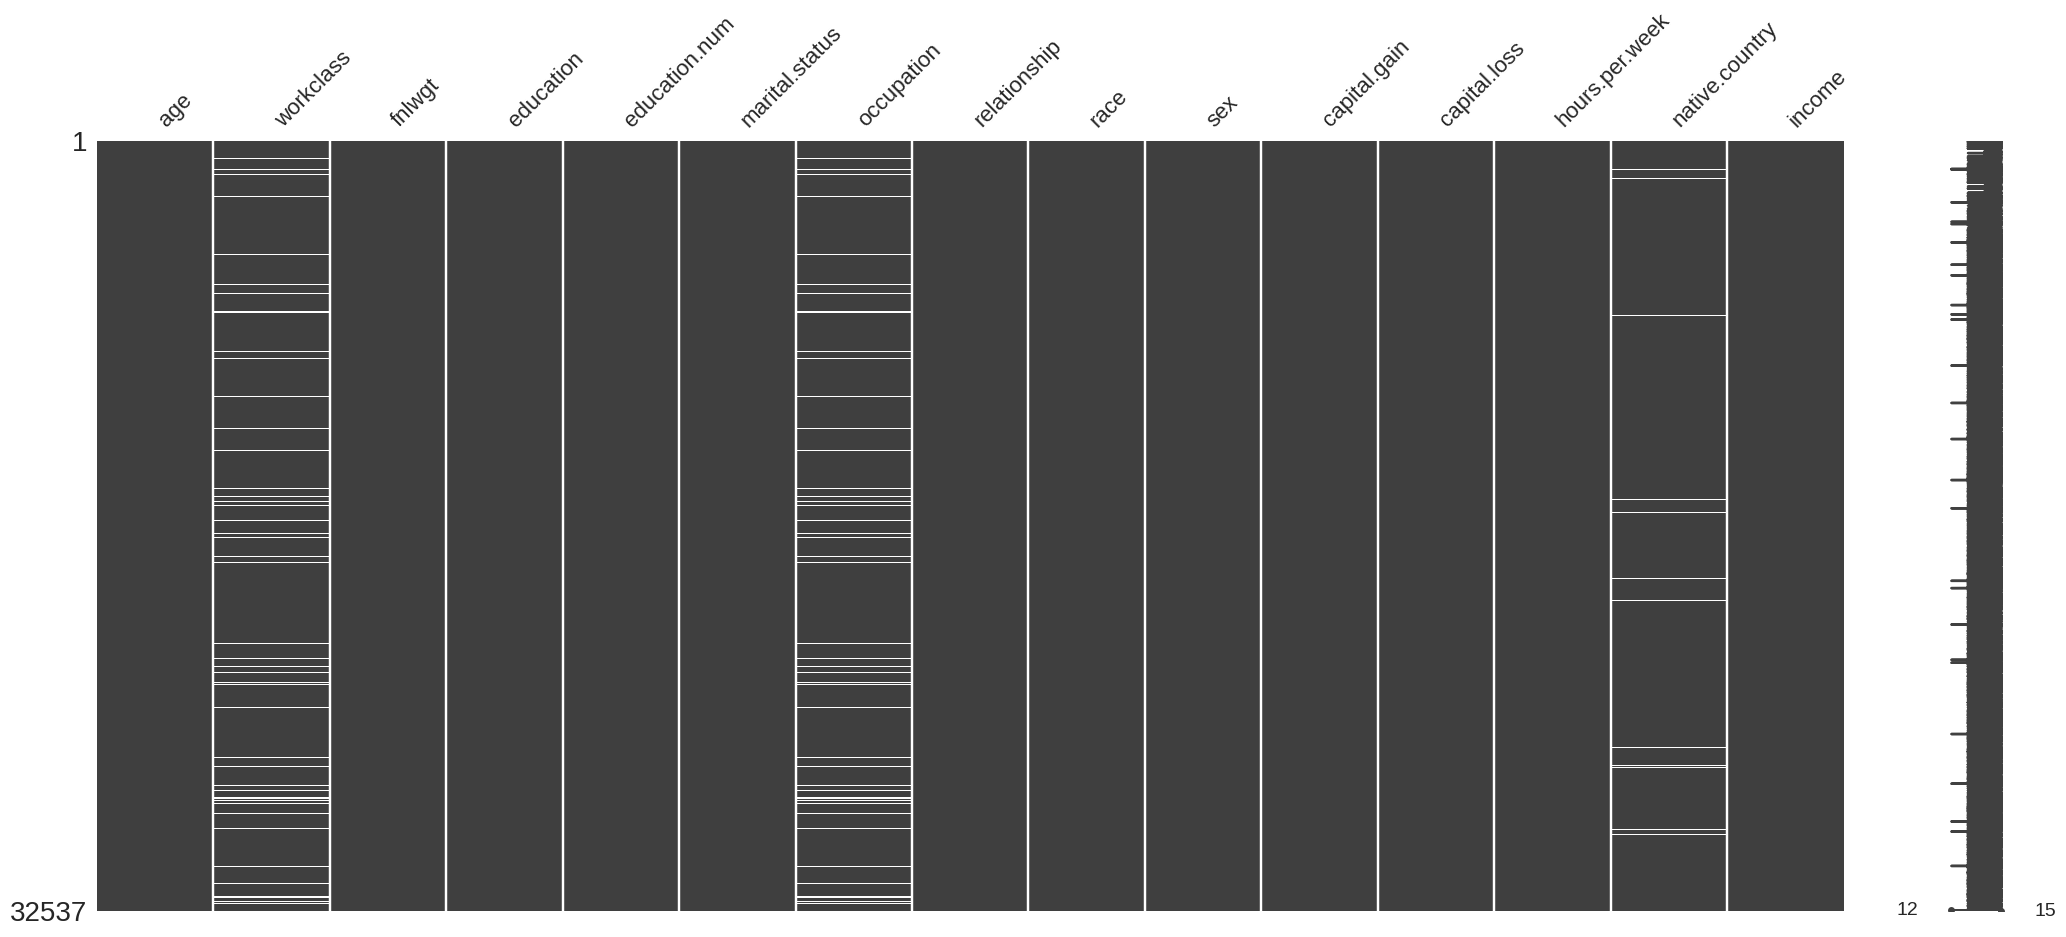

In [33]:
!pip install missingno
import missingno as msno
msno.matrix(df)

In [34]:
num_imputer = SimpleImputer(strategy = "median")
cat_imputer = SimpleImputer(strategy= "most_frequent")

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [35]:
#Let's observe our data in a table

def get_unique_values(df):
  output_data = []

  for col in df.columns :
     if df.loc[: ,col].nunique() <= 10 :
      unique_values = df.loc[: , col].unique()
      output_data.append([col , df.loc[: , col].nunique(), unique_values, df.loc[:, col].dtype])
     else:
      output_data.append([col , df.loc[: , col].nunique(), "-", df.loc[:, col].dtype])

  output_df = pd.DataFrame(output_data , columns = ["Column Name", "Name of Unique Values", "Unique Values", "Data Types"])
  return output_df

In [36]:
get_unique_values(df)

Column Name  Name of Unique Values  \
0              age                     73   
1        workclass                      8   
2           fnlwgt                  21648   
3        education                     16   
4    education.num                     16   
5   marital.status                      7   
6       occupation                     14   
7     relationship                      6   
8             race                      5   
9              sex                      2   
10    capital.gain                    119   
11    capital.loss                     92   
12  hours.per.week                     94   
13  native.country                     41   
14          income                      2   

                                        Unique Values Data Types  
0                                                   -    float64  
1   [Private, State-gov, Federal-gov, Self-emp-not...     object  
2                                                   -    float64  
3                                                   -     object  
4                                                   -    float64  
5   [Widowed, Divorced, Separated, Never-married, ...     object  
6                                                   -     object  
7   [Not-in-family, Unmarried, Own-child, Other-re...     object  
8   [White, Black, Asian-Pac-Islander, Other, Amer...     object  
9                                      [Female, Male]     object  
10                                                  -    float64  
11                                                  -    float64  
12                                                  -    float64  
13                                                  -     object  
14                                             [0, 1]      int64

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature          ", "          Unique values per Numerical feature"))

for col_type, col, color in [("exclude", 1, '#016CC9'), ("include", 2, '#DEB078')]:
    temp_data = df.select_dtypes(**{col_type: "number"}).nunique().sort_values()
    fig.add_trace(go.Bar(x=temp_data.index, y=temp_data.values, marker=dict(color=color)), row=1, col=col)

fig.show()

# Feature Engineering and Outliers

## Categorical Features

In [38]:
df[cat_features].columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

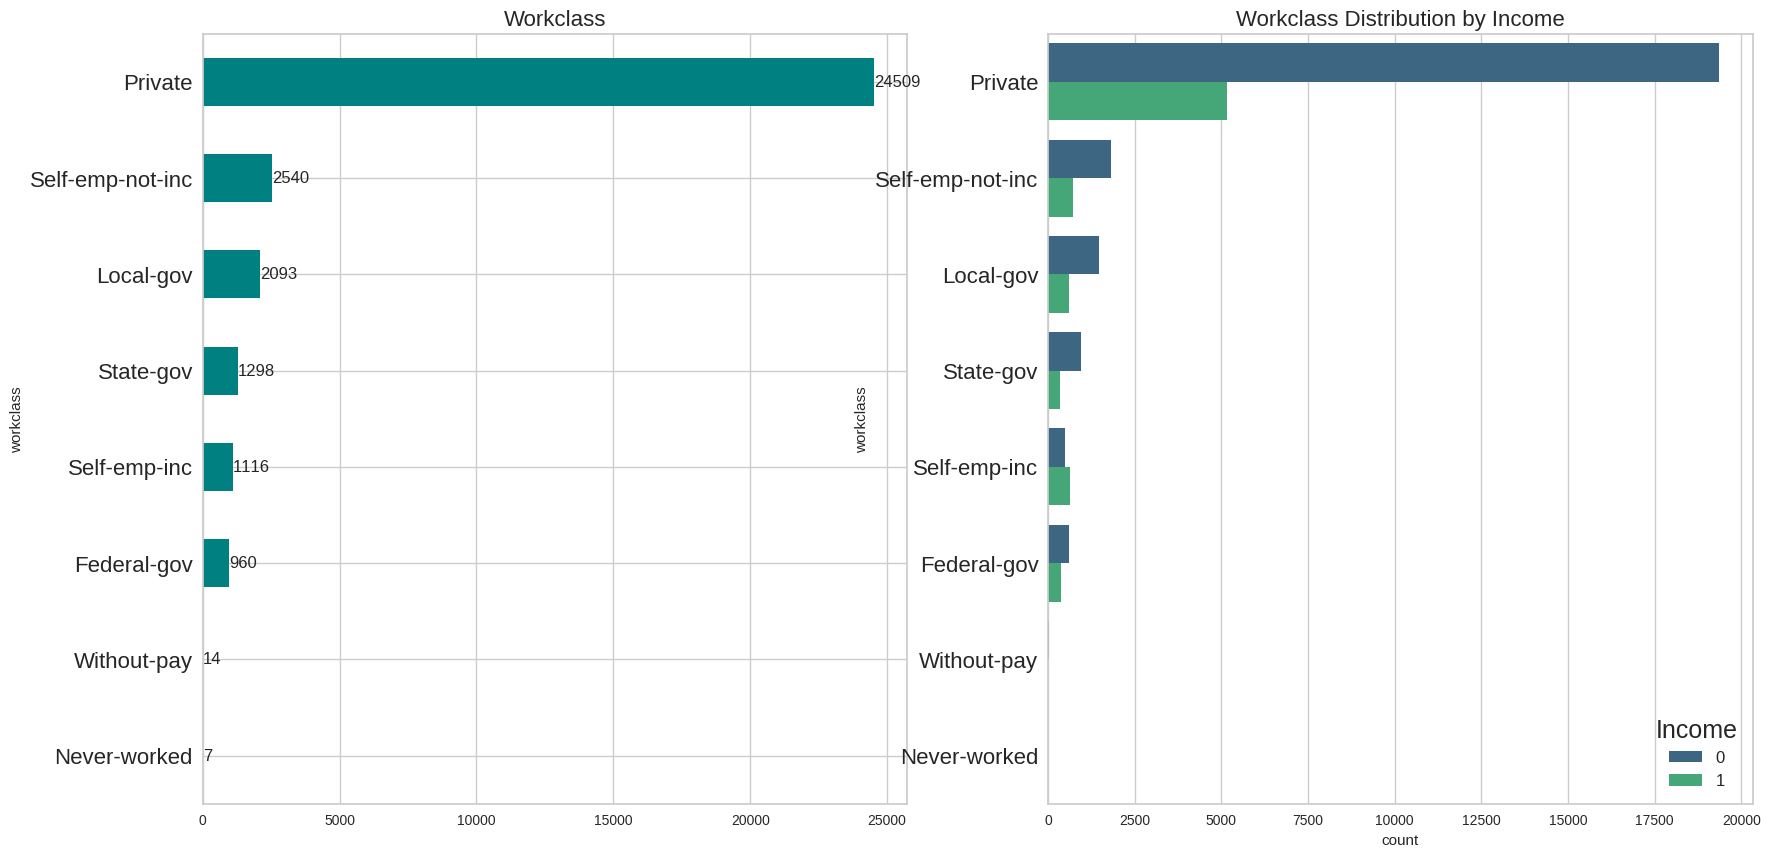

In [39]:
sorted_workclass = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize =(20,10))

counts = df["workclass"].value_counts().sort_values(ascending= True)
counts.plot(kind = "barh" , ax = ax1, color = "teal")
ax1.set_title("Workclass" , fontsize = 16)
ax1.bar_label(ax1.containers[0], labels = counts.values , fontsize = 12)
ax1.tick_params(axis ="y" , labelsize = 16)

sns.countplot(y=df["workclass"], hue=df['income'].astype(str), ax=ax2, palette='viridis', order=sorted_workclass)
ax2.set_title('Workclass Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=12, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16);


General Insights

The private sector is the most dominant category among the work classes and creates a significant disparity in income distribution.

Among self-employed individuals, those who are incorporated earn higher incomes compared to those who are not incorporated.

For local, state, and federal government jobs, the low-income category is dominant; however, a significant portion also falls into the high-income category.

Individuals who work without pay and those who have never worked are generally found in the low-income category.

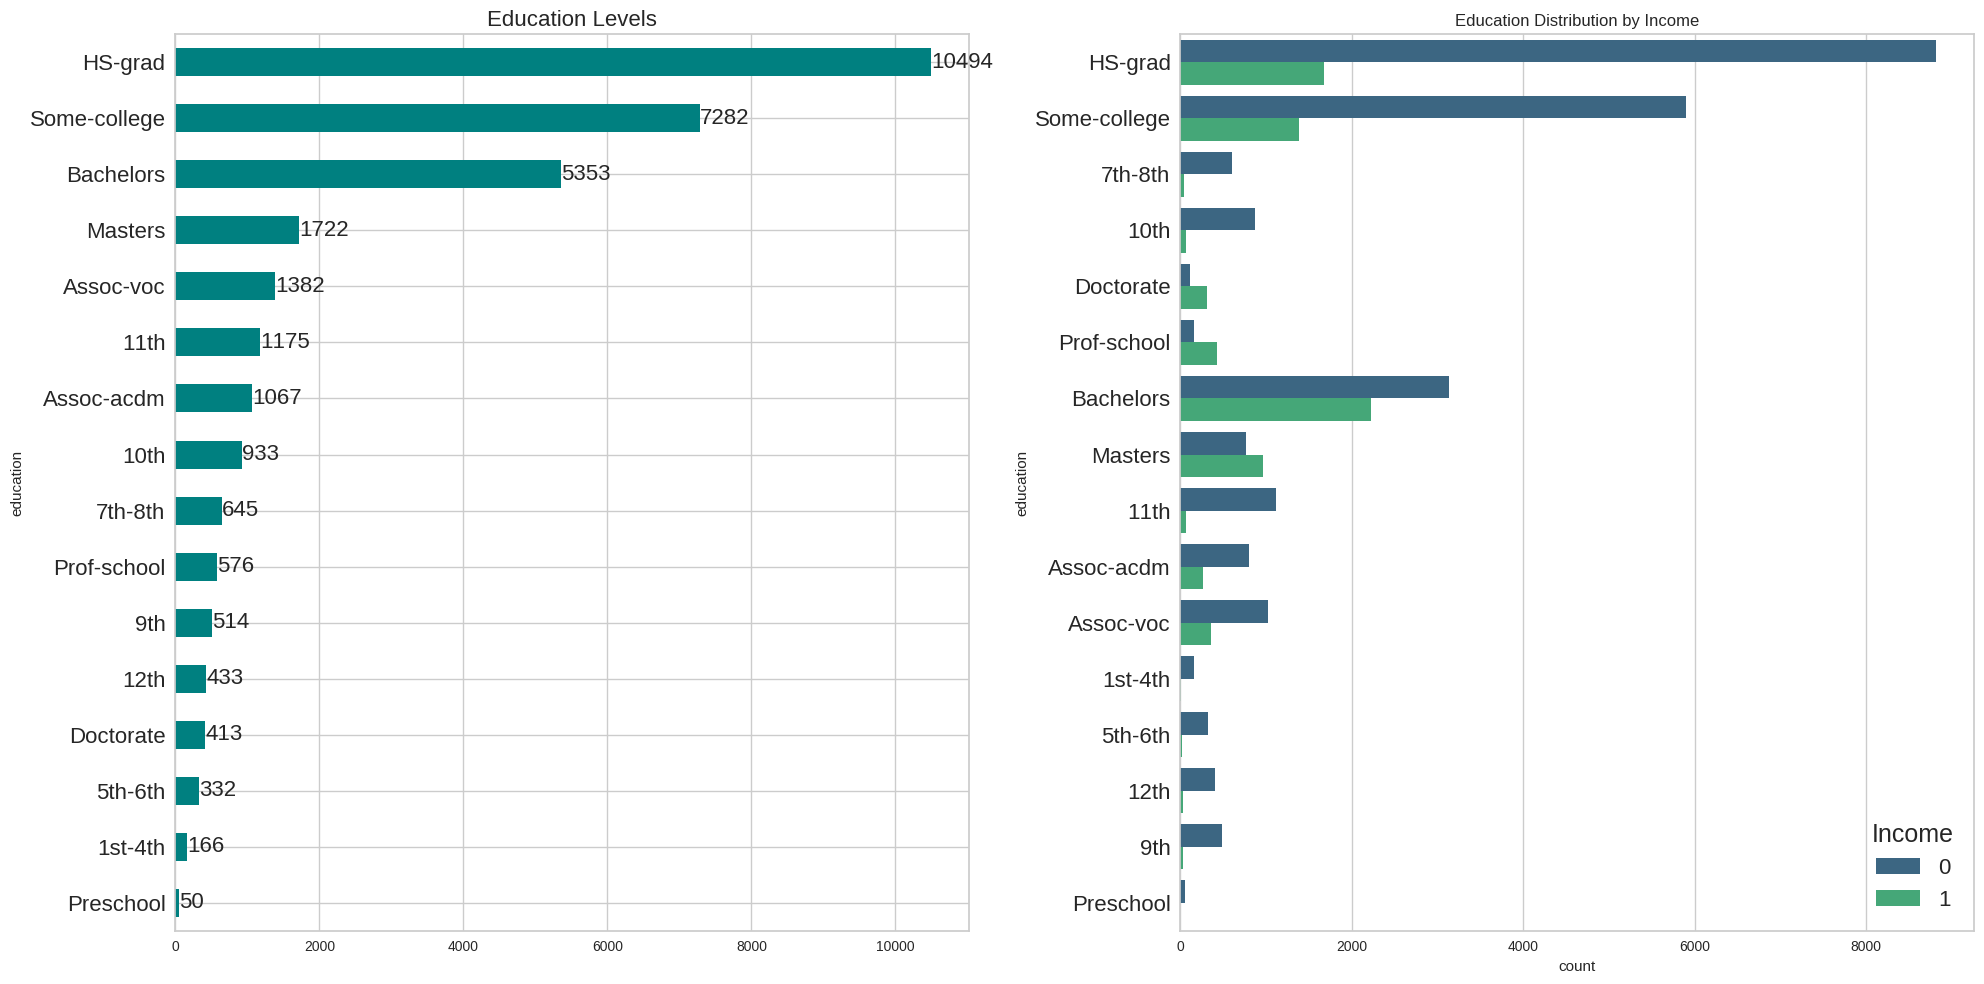

In [40]:
sorted_education = df["education"].value_counts().index[::-1]

fig, (ax1, ax2) = plt.subplots(1 , 2 , figsize = (20,10))


counts = df["education"].value_counts().sort_values(ascending = True)
counts.plot(kind = "barh", ax = ax1, color = "teal")
ax1.set_title("Education Levels", fontsize = 16)
ax1.bar_label(ax1.containers[0], labels= counts.values, fontsize = 16)
ax1.tick_params(axis ="y", labelsize = 16)

sns.countplot(y=df["education"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title("Education Distribution by Income")
ax2.legend(title = "Income", loc ="lower right", fontsize = 16, title_fontsize = "18")
ax2.tick_params(axis = "y", labelsize = 16)

plt.tight_layout()
plt.show()

In [41]:
df["education"].replace(['1st-4th', '5th-6th'], "elemenary_school", inplace = True)
df["education"].replace(['7th-8th', '9th', '10th', '11th', '12th'], "secondary_school", inplace = True)
df['education'].replace(['Assoc-acdm', 'Assoc-voc'], 'Assoc', inplace=True)

**Category Merging**: Dividing education levels into too many categories can complicate data analysis and modeling processes. Therefore, similar levels have been combined to form larger and more meaningful categories.

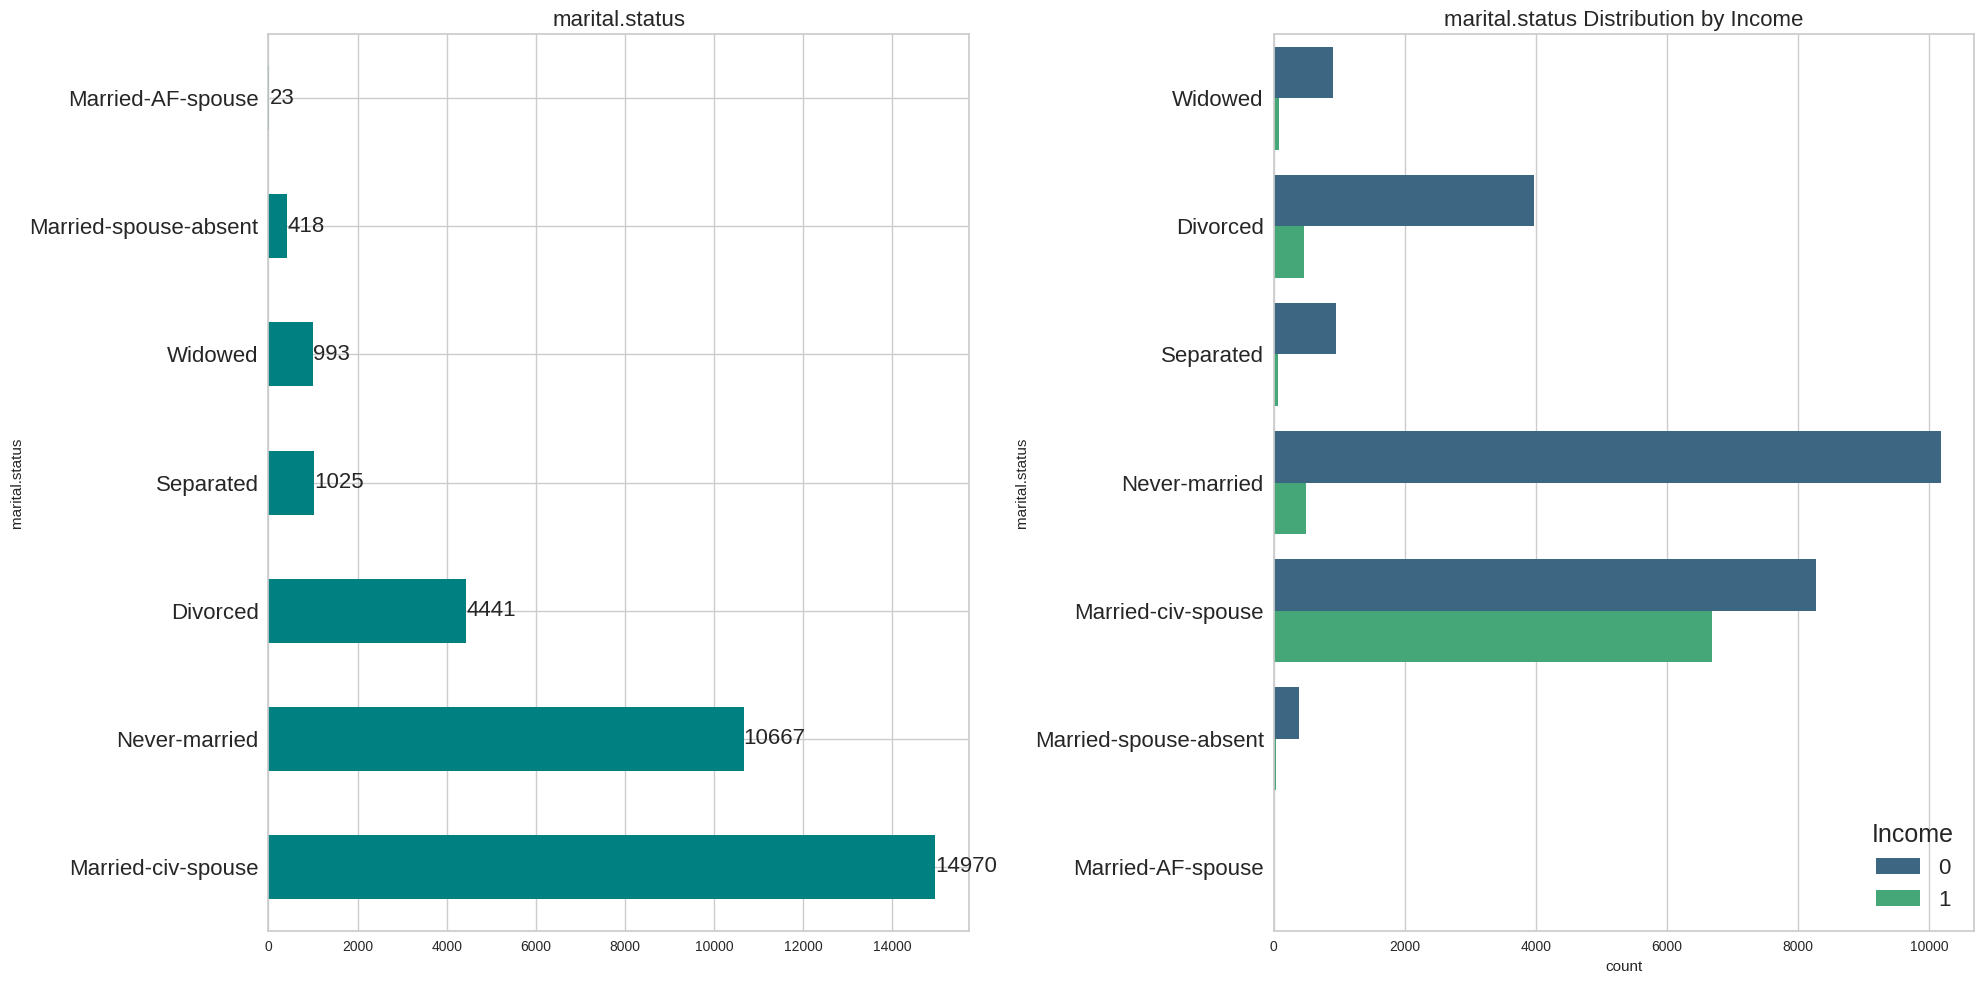

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Birinci grafik: Top Education Levels
counts = df['marital.status'].value_counts()
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('marital.status', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='y', labelsize=16)

# İkinci grafik: Education Distribution by Income
sns.countplot(y=df["marital.status"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('marital.status Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [43]:
df["marital.status"].replace(["Nevel-married"], "NotMarried", inplace = True)
df["marital.status"].replace(['Married-AF-spouse', 'Married-civ-spouse'], 'Married', inplace=True)
df['marital.status'].replace(
    ['Married-spouse-absent', 'Separated'], 'Separated', inplace=True
)
df['marital.status'].replace(
    ['Divorced', 'Widowed'], 'Widowed', inplace=True
)


**Marital Status Categories Merging **In order to simplify the analysis and improve model performance, we combined similar marital status categories. This helps in reducing the number of distinct categories, making the data more manageable and the results more interpretable.

<Axes: xlabel='age', ylabel='Count'>

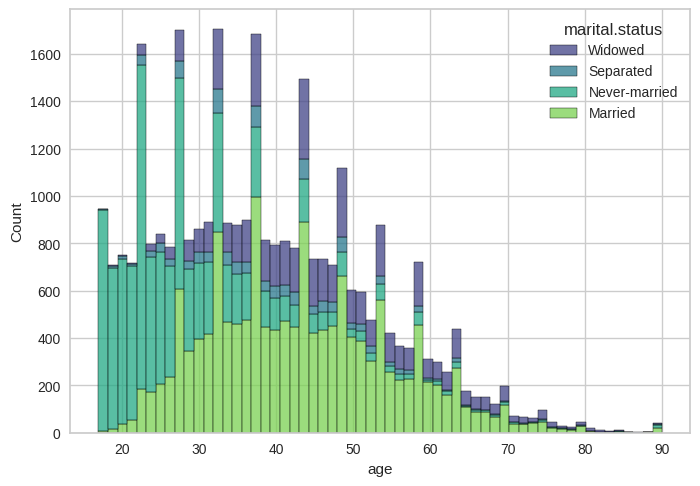

In [44]:
sns.histplot(data = df, x = "age", hue = "marital.status", multiple = "stack", palette= "viridis")


General Insights

Marriage and Age: Marriage rates are low among young adults, peak in middle age, and decline again in older age. This indicates that focusing on education and career is common in early life, marriage and family building are more prevalent in middle age, and loss of a spouse increases in older age.

Tendency Not to Marry: The non-marriage rates are higher among younger age groups, suggesting that education and career-oriented lifestyles are more common in modern societies.

Loss of Spouse and Separations: Widowhood is more common in older age, while separations are more concentrated in middle age. This suggests that both increased rates of spouse loss due to health reasons and midlife crises or marital problems are more frequent in these age groups.

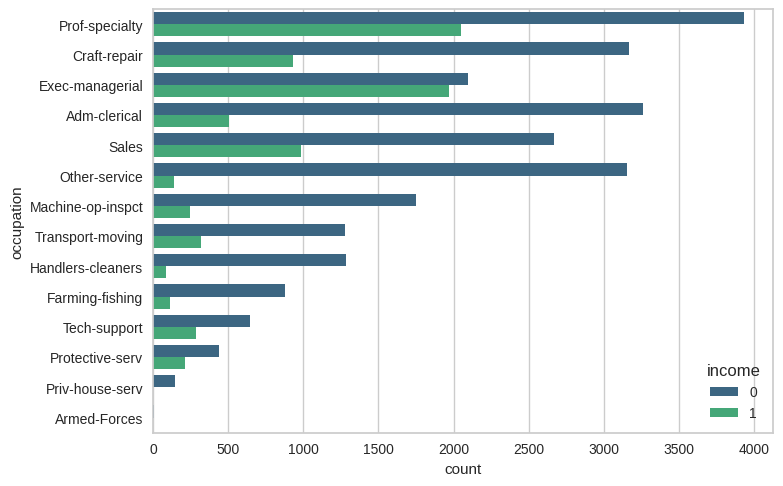

In [45]:
sns.countplot(y='occupation', hue='income', data=df, order=df['occupation'].value_counts().index, palette='viridis');

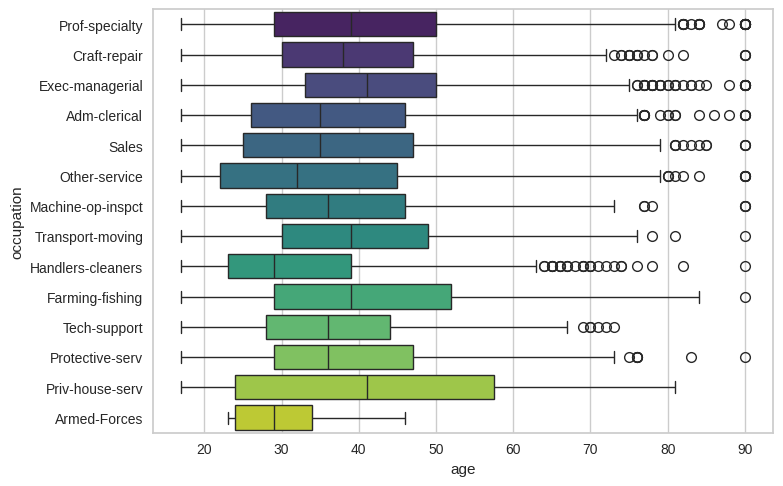

In [46]:
sns.boxplot(y='occupation', x='age', data=df, order=df['occupation'].value_counts().index, palette='viridis');

Text(0.5, 1.0, 'Occupation Distribution by Sex')

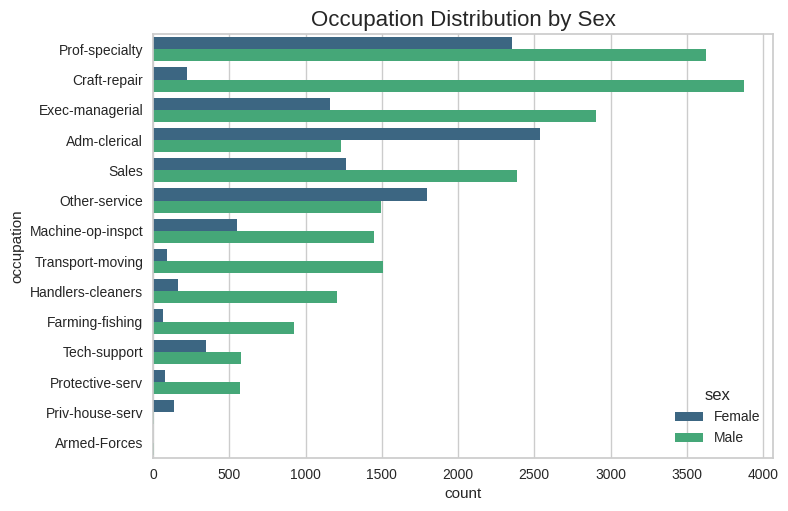

In [47]:
sns.countplot(y = "occupation", hue = "sex", data = df, order = df["occupation"].value_counts().index, palette = "viridis")
plt.title("Occupation Distribution by Sex", fontsize = 16)

<Axes: xlabel='occupation', ylabel='education'>

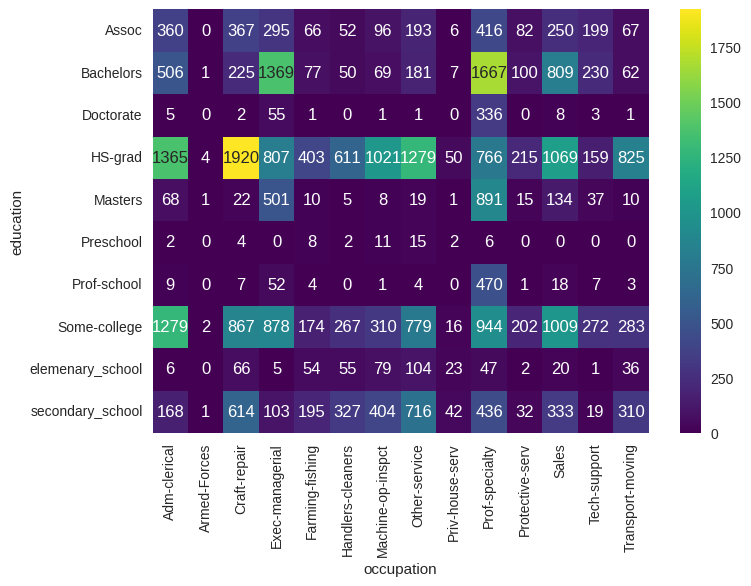

In [48]:
pivot_table = df.pivot_table(index = "education", columns = "occupation", aggfunc = "size", fill_value=0)
sns.heatmap(pivot_table, annot = True, fmt = "d", cmap = "viridis")

In [49]:
pivot_table

occupation        Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
education                                                                     
Assoc                      360             0           367              295   
Bachelors                  506             1           225             1369   
Doctorate                    5             0             2               55   
HS-grad                   1365             4          1920              807   
Masters                     68             1            22              501   
Preschool                    2             0             4                0   
Prof-school                  9             0             7               52   
Some-college              1279             2           867              878   
elemenary_school             6             0            66                5   
secondary_school           168             1           614              103   

occupation        Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
education                                                                 
Assoc                          66                 52                 96   
Bachelors                      77                 50                 69   
Doctorate                       1                  0                  1   
HS-grad                       403                611               1021   
Masters                        10                  5                  8   
Preschool                       8                  2                 11   
Prof-school                     4                  0                  1   
Some-college                  174                267                310   
elemenary_school               54                 55                 79   
secondary_school              195                327                404   

occupation        Other-service  Priv-house-serv  Prof-specialty  \
education                                                          
Assoc                       193                6             416   
Bachelors                   181                7            1667   
Doctorate                     1                0             336   
HS-grad                    1279               50             766   
Masters                      19                1             891   
Preschool                    15                2               6   
Prof-school                   4                0             470   
Some-college                779               16             944   
elemenary_school            104               23              47   
secondary_school            716               42             436   

occupation        Protective-serv  Sales  Tech-support  Transport-moving  
education                                                                 
Assoc                          82    250           199                67  
Bachelors                     100    809           230                62  
Doctorate                       0      8             3                 1  
HS-grad                       215   1069           159               825  
Masters                        15    134            37                10  
Preschool                       0      0             0                 0  
Prof-school                     1     18             7                 3  
Some-college                  202   1009           272               283  
elemenary_school                2     20             1                36  
secondary_school               32    333            19               310

# General Insights

**General InsightsIncome and Occupation:** Professional and managerial roles yield higher incomes, while service and manual labor roles are lower-income.

**Age and Occupation**: Older individuals are more prevalent in high-responsibility roles, whereas younger individuals occupy more entry-level or physically demanding jobs.

Gender and Occupation: **bold text** There are significant gender disparities, with males dominating technical and managerial fields and females more present in clerical and service roles.

**Education and Occupation:** Higher education levels correlate with higher-level occupations, whereas lower education levels are sufficient for service and manual jobs.

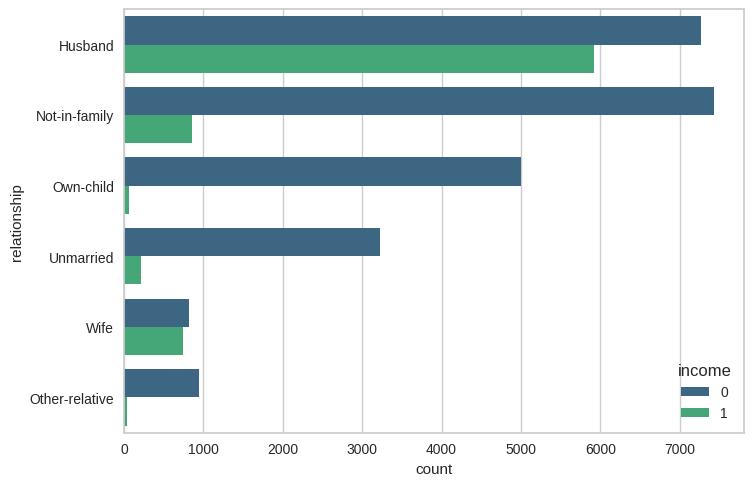

In [50]:
sns.countplot(y='relationship', hue='income', data=df, order=df['relationship'].value_counts().index, palette='viridis');

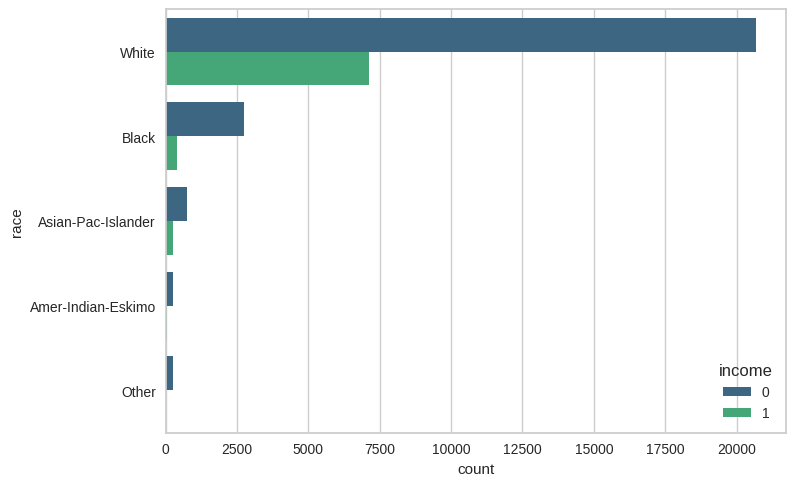

In [51]:
sns.countplot(y='race', hue='income', data=df, order=df['race'].value_counts().index, palette='viridis');

In [52]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

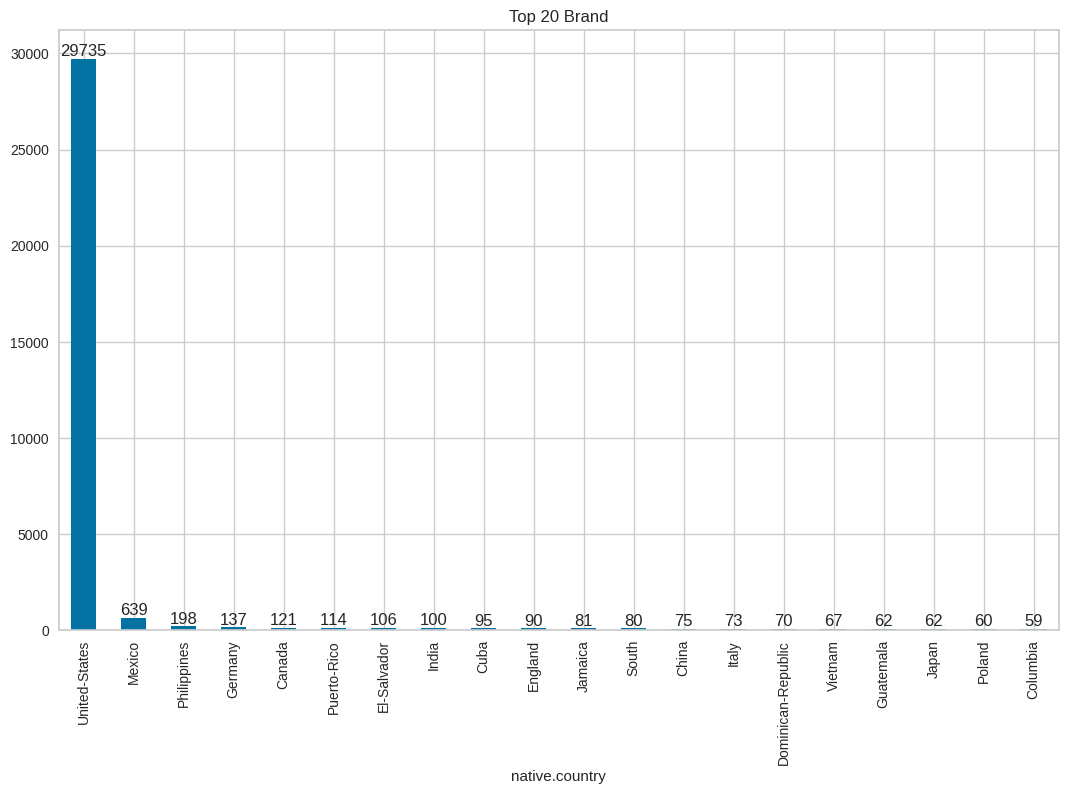

In [53]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df["native.country"].value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')
plt.xlabel('native.country')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [54]:
df['native.country'] = df['native.country'].replace({
    "USA": "United-States"
}).apply(lambda x: "United-States" if x == "United-States" else ("Mexico" if x == "Mexico" else "Other"))

# General Insights:

**Data Imbalance:**
The data is heavily skewed towards individuals from the United States, which could impact the generalizability of any models or analyses performed.

The dataset is predominantly composed of individuals from the United States, with a minor but noticeable representation from Mexico and a variety of other countries. This heavy imbalance towards the US population suggests the need for careful handling of data to avoid biases.

Given the significant representation from Mexico, segmented analyses (e.g., comparing outcomes between US natives and Mexican immigrants) might be feasible and insightful.

For other countries with smaller representations, aggregated analyses might be more appropriate.

# Numerical Features

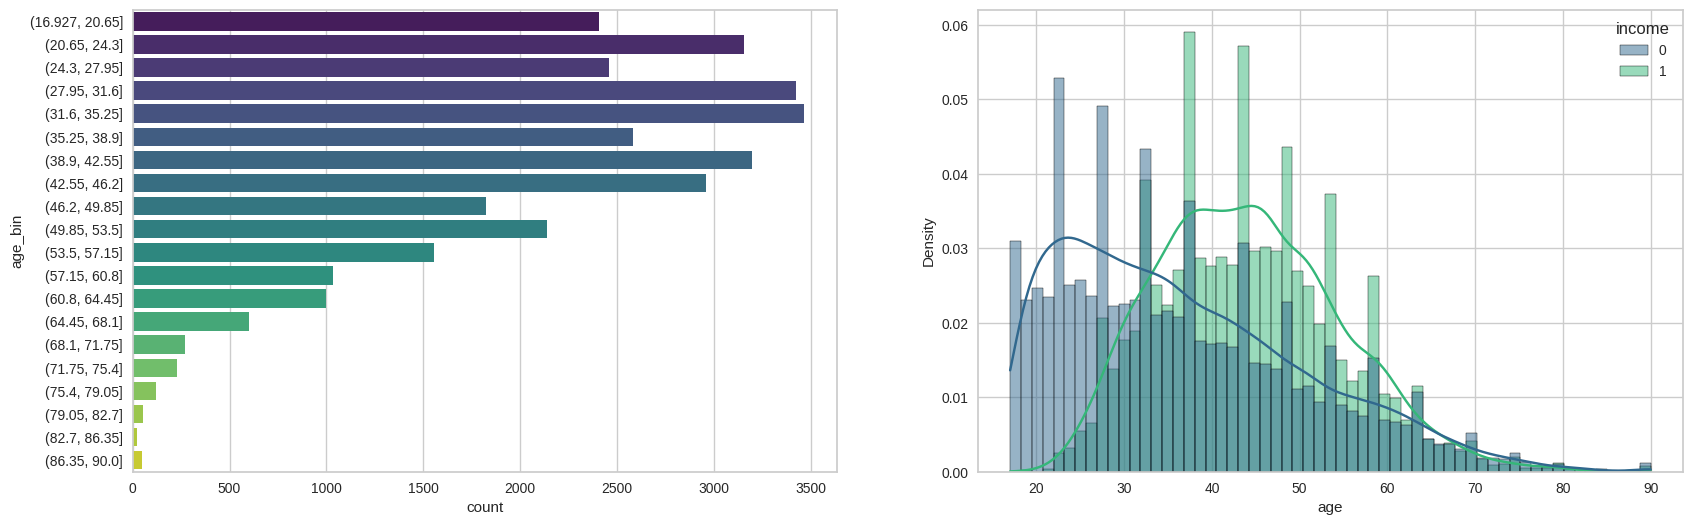

In [55]:
df["age_bin"] = pd.cut(df["age"], bins = 20)

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,6))
sns.countplot(y = "age_bin", data = df, palette = "viridis", ax = ax1)
sns.histplot(data = df , x = "age", hue = "income", kde = True, palette = "viridis", ax = ax2, stat = "density", common_norm = False);

In [56]:
px.histogram(df, x = "capital.gain", color = "income", barmode = "group", title="Income Distribution by Capital Gain")

In [57]:
px.histogram(df, x = "capital.loss", color="income", barmode="group", title = "Income Distribution by Capital Gain'")

In [58]:
df["capital_diff"] = df["capital.gain"] - df["capital.loss"]

In [59]:
df["capital_diff"].describe()

count    32537.000000
mean       991.075514
std       7411.670204
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_diff, dtype: float64

In [60]:
df["capital_diff"] = pd.cut(df["capital_diff"], bins = [-5000, 5000, 100000], labels = ["low", "high"])

In [61]:
df["capital_diff"].isnull().sum()

0

In [62]:
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

**Purpose:** To combine the capital.gain (capital gain) and capital.loss (capital loss) columns into a single column to calculate the net capital gain.

**Result:** A new column named capital_diff is created.

In [63]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital diff')

In [64]:
df["capital_diff"].nunique()

2

In [65]:
px.histogram(df, x='hours.per.week', color="income", barmode='group', title='Income Distribution by Hours per Week')

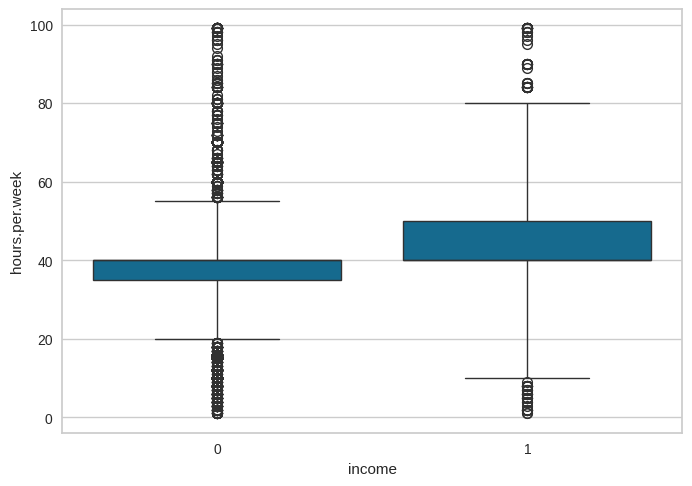

In [66]:
sns.boxplot(data=df,y="hours.per.week",x='income', whis=3);

In [67]:
outliers = df[df['hours.per.week'] > 80]
outliers_income_counts = outliers['income'].value_counts()
outliers_income_counts

income
0    145
1     63
Name: count, dtype: int64

In [68]:
outliers = df[df['hours.per.week'] < 15]
outliers_income_counts = outliers['income'].value_counts()
outliers_income_counts

income
0    892
1     81
Name: count, dtype: int64

In [69]:
df = df[~((df["hours.per.week"] > 80) | (df["hours.per.week"] < 15))]

The code segments are used to analyze the income status of individuals with extremely high or low weekly working hours and to remove these outliers from the dataset.

In [70]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

fnlwgt: As a result of the analysis, the effect of fnlwgt on the model is almost negligible. Therefore, it was excluded from the data.

In [71]:
df.drop(['age_bin'], axis = 1, inplace = True)

In [72]:

df.shape

(31356, 13)

In [73]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'capital_diff'],
      dtype='object')

# **Correlation**

In [74]:
numeric_df = df.select_dtypes(include = ["number"])
corr_matrix = numeric_df.corr()


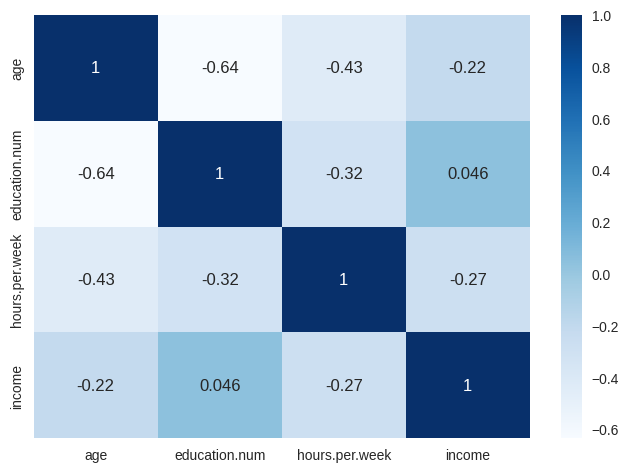

In [75]:
sns.heatmap(corr_matrix.corr(), annot= True, cmap = "Blues");

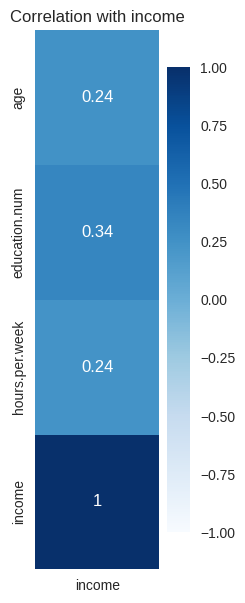

In [76]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()

    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'income')

# Multicollinearity

In [77]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

In [78]:
X = df.drop("income", axis=1)
y = df['income']

# Models

## Train and Test Split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


## make_column_transformer

In [80]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'capital_diff'],
      dtype='object')

In [81]:
df

age workclass         education  education.num marital.status  \
0      90.0   Private           HS-grad            9.0        Widowed   
1      82.0   Private           HS-grad            9.0        Widowed   
2      66.0   Private      Some-college           10.0        Widowed   
3      54.0   Private  secondary_school            4.0        Widowed   
4      41.0   Private      Some-college           10.0      Separated   
...     ...       ...               ...            ...            ...   
32556  22.0   Private      Some-college           10.0  Never-married   
32557  27.0   Private             Assoc           12.0        Married   
32558  40.0   Private           HS-grad            9.0        Married   
32559  58.0   Private           HS-grad            9.0        Widowed   
32560  22.0   Private           HS-grad            9.0  Never-married   

              occupation   relationship   race     sex  hours.per.week  \
0         Prof-specialty  Not-in-family  White  Female            40.0   
1        Exec-managerial  Not-in-family  White  Female            18.0   
2         Prof-specialty      Unmarried  Black  Female            40.0   
3      Machine-op-inspct      Unmarried  White  Female            40.0   
4         Prof-specialty      Own-child  White  Female            40.0   
...                  ...            ...    ...     ...             ...   
32556    Protective-serv  Not-in-family  White    Male            40.0   
32557       Tech-support           Wife  White  Female            38.0   
32558  Machine-op-inspct        Husband  White    Male            40.0   
32559       Adm-clerical      Unmarried  White  Female            40.0   
32560       Adm-clerical      Own-child  White    Male            20.0   

      native.country  income capital_diff  
0      United-States       0          low  
1      United-States       0          low  
2      United-States       0          low  
3      United-States       0          low  
4      United-States       0          low  
...              ...     ...          ...  
32556  United-States       0          low  
32557  United-States       0          low  
32558  United-States       1          low  
32559  United-States       0          low  
32560  United-States       0          low  

[31356 rows x 13 columns]

In [82]:
df["capital_diff"].isnull().sum()

0

In [83]:
cat_onehot = [
    'workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country',
    'marital.status'
]
cat_ordinal = ['education', 'capital_diff']

cat_for_edu = [
    'Preschool', 'elemenary_school', 'secondary_school', 'HS-grad',
    'Some-college', 'Assoc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
cat_for_capdiff = ['low', 'high']

In [84]:

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    (OrdinalEncoder(categories=[cat_for_edu, cat_for_capdiff]), cat_ordinal),
    remainder=StandardScaler())

# Logistic Regression Model

In [85]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipe_model = Pipeline(steps=operations)


pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(max_iter=1000, random_state=42))])

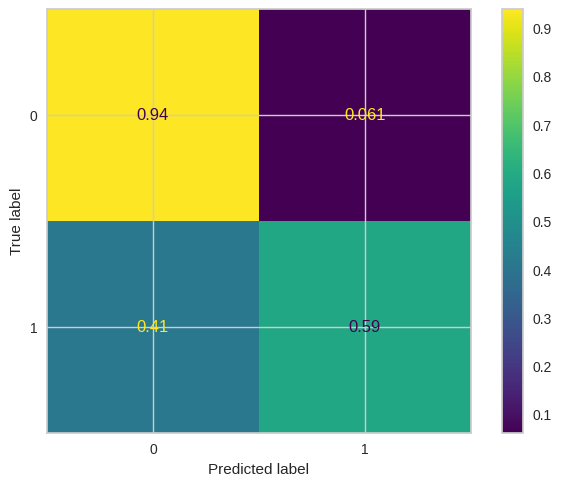

In [86]:

ConfusionMatrixDisplay.from_estimator(pipe_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true');

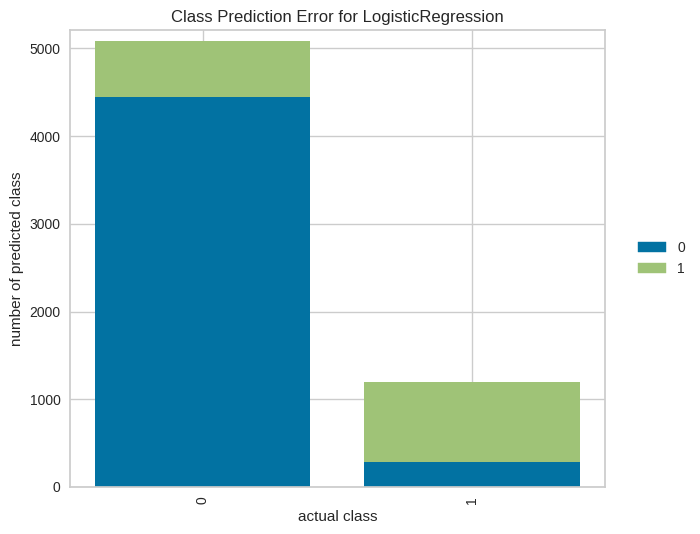

In [87]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [88]:
def eval_metric(model, X_train, y_train, X_test, y_test,i):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [89]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "logistic")

logistic Test_Set
[[4443  290]
 [ 636  903]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4733
           1       0.76      0.59      0.66      1539

    accuracy                           0.85      6272
   macro avg       0.82      0.76      0.78      6272
weighted avg       0.85      0.85      0.85      6272


logistic Train_Set
[[17632  1296]
 [ 2528  3628]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18928
           1       0.74      0.59      0.65      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.76      0.78     25084
weighted avg       0.84      0.85      0.84     25084



In [90]:

operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipecv_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(pipecv_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=cv,
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy      0.846635
train_accuracy     0.847588
test_precision     0.734640
train_precision    0.736249
test_recall        0.588371
train_recall       0.590499
test_f1            0.653062
train_f1           0.655367
dtype: float64


# Precision Recall Curve and Roc Curve Display

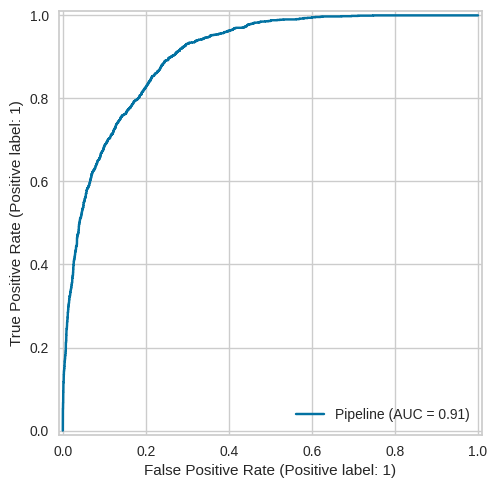

In [91]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

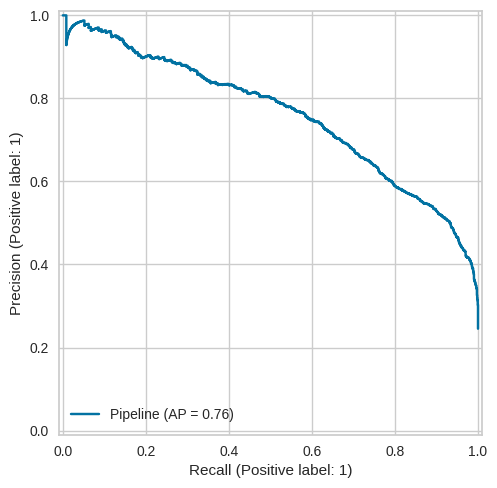

In [92]:

PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);


# GridSearchCV

param_grid = [ { "logistic__penalty" : ['l1', 'l2'], "logistic__C" : [0.01, 0.05,0.03, 0.1, 1], "logistic__class_weight": ["balanced", None] , "logistic__solver": ['liblinear', 'saga', 'lbfgs'], "logistic__max_iter": [1000, 2000] } ]

Many grids of money have been tried. Finally, the following features were identified.

In [93]:

operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10)

grid_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [94]:

grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(C=0.03, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [95]:

grid_model.best_score_

0.683264633932356

In [96]:

grid_model.best_index_

0

In [97]:
pd.DataFrame(grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.683265
mean_train_score    0.682596
Name: 0, dtype: object

In [98]:
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)

log_recall = recall_score(y_test, y_pred)

log_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, grid_model.predict_proba(X_test)[:, 1])
log_prc = auc(recall, precision)

log_grid_model = eval_metric(grid_model, X_train, y_train, X_test, y_test,"logisticgrid")
log_grid_model

logisticgrid Test_Set
[[3783  950]
 [ 253 1286]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4733
           1       0.58      0.84      0.68      1539

    accuracy                           0.81      6272
   macro avg       0.76      0.82      0.77      6272
weighted avg       0.85      0.81      0.82      6272


logisticgrid Train_Set
[[15047  3881]
 [  952  5204]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     18928
           1       0.57      0.85      0.68      6156

    accuracy                           0.81     25084
   macro avg       0.76      0.82      0.77     25084
weighted avg       0.85      0.81      0.82     25084



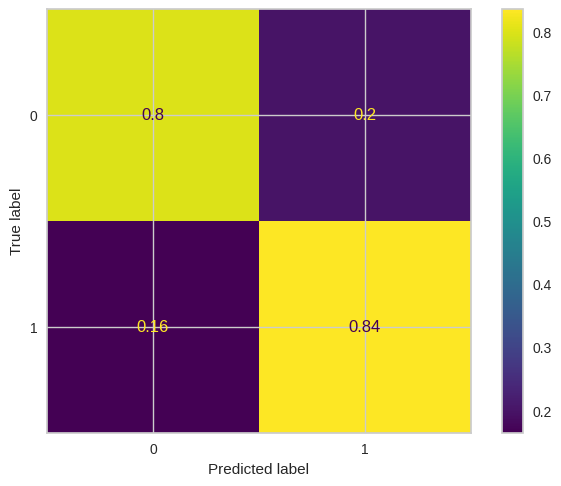

In [100]:

log_grid_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true');

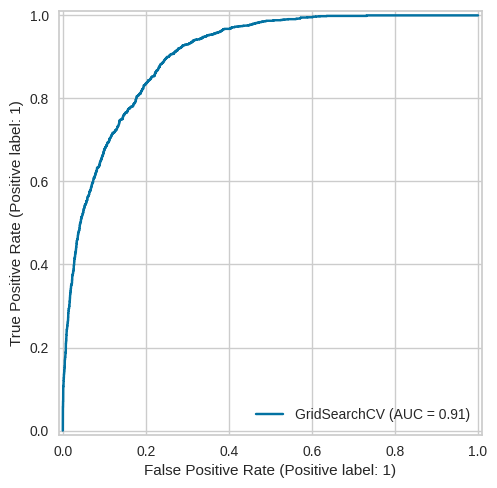

In [101]:

RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

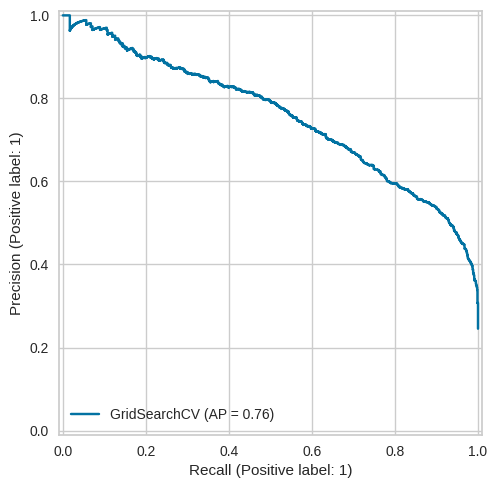

In [102]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);



# KNN Model

In [103]:

operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [104]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "knn")

knn Test_Set
[[4286  447]
 [ 657  882]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4733
           1       0.66      0.57      0.62      1539

    accuracy                           0.82      6272
   macro avg       0.77      0.74      0.75      6272
weighted avg       0.82      0.82      0.82      6272


knn Train_Set
[[17746  1182]
 [ 1881  4275]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.78      0.69      0.74      6156

    accuracy                           0.88     25084
   macro avg       0.84      0.82      0.83     25084
weighted avg       0.87      0.88      0.88     25084



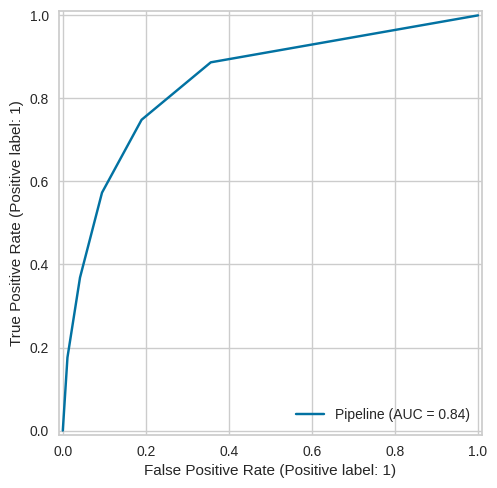

In [105]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

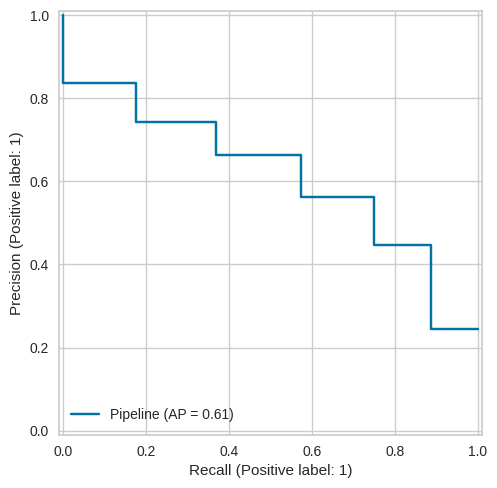

In [106]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

# Elbow Method for Choosing Reasonable K Values

In [107]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [108]:
test_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5)

    f1_mean = scores["test_f1"].mean()

    test_error = 1 - f1_mean

    test_error_rates.append(test_error)

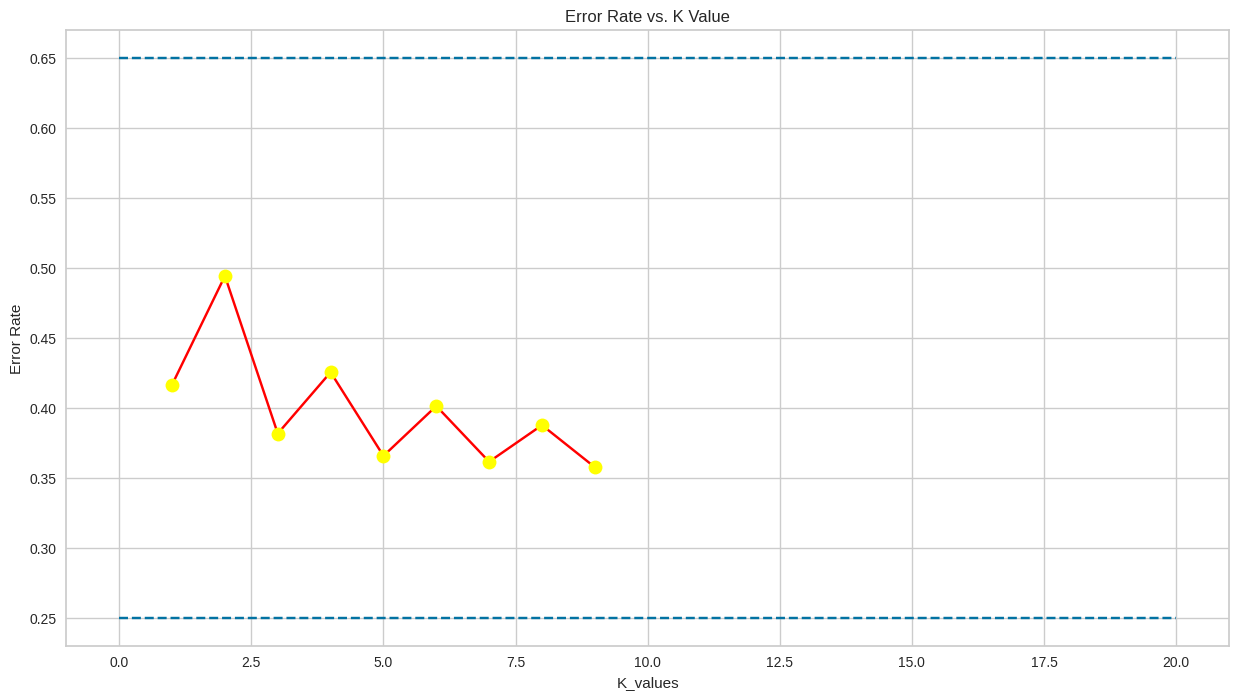

In [109]:

plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")


# Overfiting and underfiting control for k values

In [110]:
test_error_rates = []
train_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5, return_train_score=True)

    f1_test_mean = scores["test_f1"].mean()
    f1_train_mean = scores["train_f1"].mean()


    test_error = 1 - f1_test_mean
    train_error = 1 -f1_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

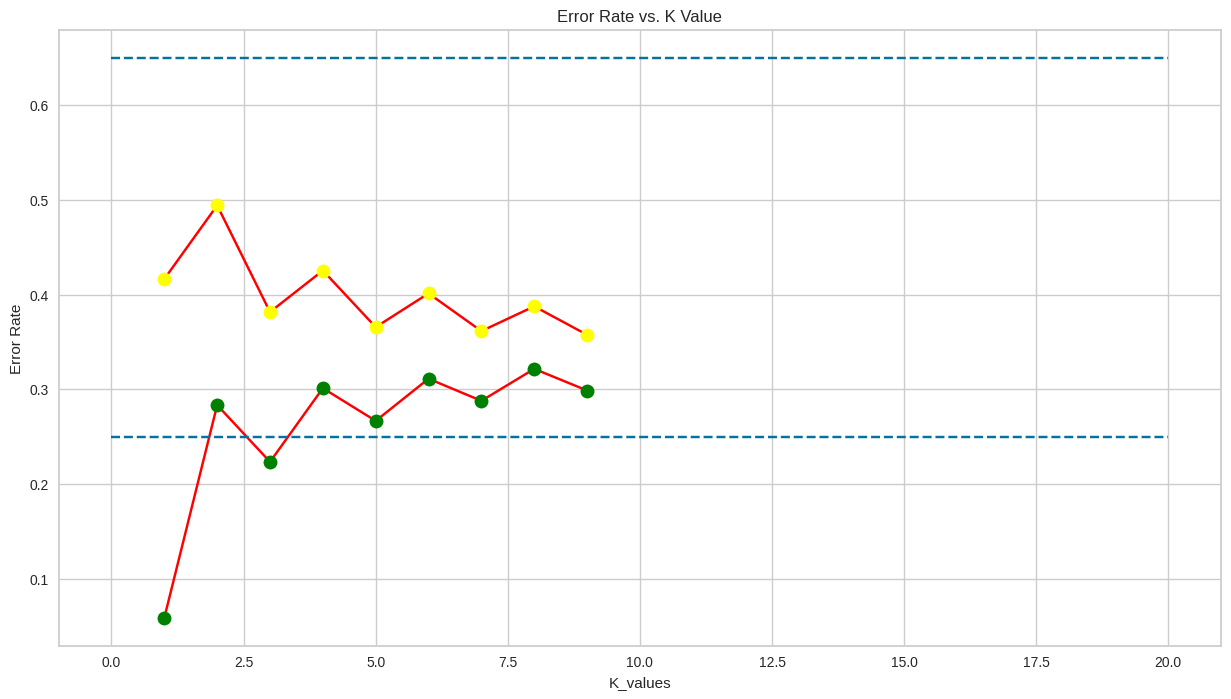

In [111]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.plot(range(1, 10),
         train_error_rates,
         color='red',
         marker='o',
         markerfacecolor='green',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")

In [112]:

k_list = [3, 5, 7]

for i in k_list:
    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test, "knn_elbow")

WITH K=3

knn_elbow Test_Set
[[4243  490]
 [ 686  853]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4733
           1       0.64      0.55      0.59      1539

    accuracy                           0.81      6272
   macro avg       0.75      0.73      0.74      6272
weighted avg       0.81      0.81      0.81      6272


knn_elbow Train_Set
[[17848  1080]
 [ 1568  4588]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18928
           1       0.81      0.75      0.78      6156

    accuracy                           0.89     25084
   macro avg       0.86      0.84      0.85     25084
weighted avg       0.89      0.89      0.89     25084

WITH K=5

knn_elbow Test_Set
[[4286  447]
 [ 657  882]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4733
           1       0.66      0.57      0.62      1539

    accuracy      


# Cross Validate For Optimal K Value

In [113]:
operations =   operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=7))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.833838
train_accuracy     0.868296
test_precision     0.682841
train_precision    0.763656
test_recall        0.603963
train_recall       0.671017
test_f1            0.640763
train_f1           0.714341
dtype: float64


# Gridsearch Method for Choosing Reasonable K Values

In [114]:

operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

In [115]:
param_grid = [
    {
        "knn__n_neighbors": [19],
        "knn__metric": ['euclidean'],
        "knn__weights": ['uniform']
    }
]

knn_grid_model = GridSearchCV(knn_model,
                              param_grid,
                              scoring='f1',
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1).fit(X_train, y_train)

In [116]:
knn_grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=19))])

In [117]:
knn_grid_model.best_index_

0

In [118]:
pd.DataFrame(
    knn_grid_model.cv_results_).loc[0,["mean_test_score", "mean_train_score"]]

mean_test_score       0.6397
mean_train_score    0.675013
Name: 0, dtype: object

In [119]:
knn_grid_model.best_score_

0.6396999259520801

In [120]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

knn_f1 = f1_score(y_test, y_pred)

knn_recall = recall_score(y_test, y_pred)

knn_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, knn_grid_model.predict_proba(X_test)[:, 1])
knn_prc = auc(recall, precision)

eval_metric(knn_grid_model, X_train, y_train, X_test, y_test, "knn_grid") #k=19

knn_grid Test_Set
[[4366  367]
 [ 625  914]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4733
           1       0.71      0.59      0.65      1539

    accuracy                           0.84      6272
   macro avg       0.79      0.76      0.77      6272
weighted avg       0.84      0.84      0.84      6272


knn_grid Train_Set
[[17492  1436]
 [ 2269  3887]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     18928
           1       0.73      0.63      0.68      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.78      0.79     25084
weighted avg       0.85      0.85      0.85     25084




# Precision Recall Curve and Roc Curve Display

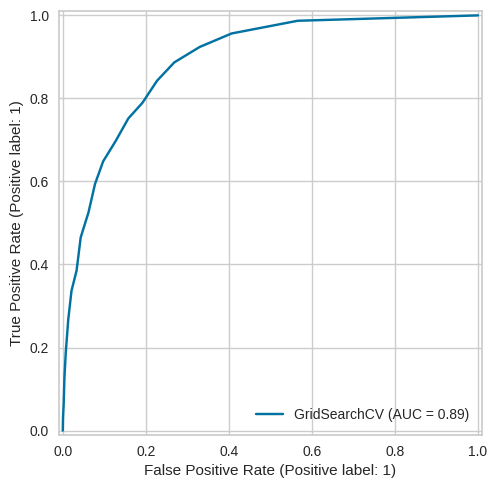

In [121]:
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [122]:
y_pred_proba = knn.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8601990887807903

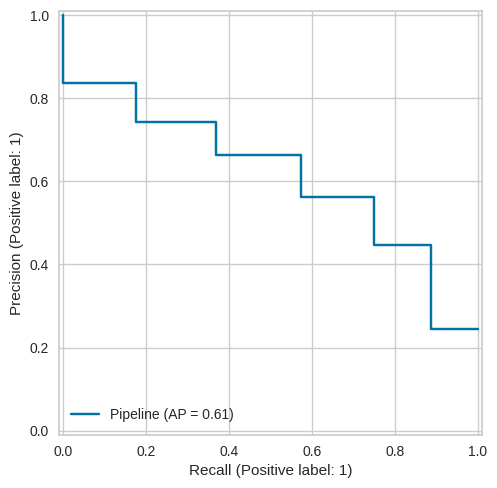

In [123]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

# SVM Model

In [124]:
operations = [("transformer", column_trans),("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(random_state=42))])

## Model Performance

In [125]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "svm")

svm Test_Set
[[4498  235]
 [ 692  847]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4733
           1       0.78      0.55      0.65      1539

    accuracy                           0.85      6272
   macro avg       0.82      0.75      0.78      6272
weighted avg       0.85      0.85      0.84      6272


svm Train_Set
[[17901  1027]
 [ 2756  3400]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     18928
           1       0.77      0.55      0.64      6156

    accuracy                           0.85     25084
   macro avg       0.82      0.75      0.77     25084
weighted avg       0.84      0.85      0.84     25084



In [126]:
operations = [("transformer", column_trans), ("SVC", SVC(random_state=42))]

pipe_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=5)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True,
                        n_jobs=-1)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.847353
train_accuracy     0.849097
test_precision     0.764130
train_precision    0.769085
test_recall        0.546947
train_recall       0.550357
test_f1            0.637474
train_f1           0.641591
dtype: float64


## GridsearchCV


param_grid = {'SVC__C': [0.01, 0.1, 1, 10, 100], 'SVC__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 0.5], 'SVC__kernel': ['rbf', 'linear'],} Many grids of money have been tried. Finally, the following features were identified.

In [127]:
param_grid = {"SVC__C":[1],
             "SVC__gamma":[0.3],
             "SVC__kernel":["rbf"]}

operations = [("transformer", column_trans), ("SVC", SVC(class_weight="balanced"))]

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall_macro",
                              cv=5,
                              return_train_score=True,
                              n_jobs=2,
                              verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [128]:
svm_model_grid.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elemenary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['low',
                                                                              'high']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(C=1, gamma=0.3, random_state=42))])

In [129]:
svm_model_grid.best_index_

0

In [130]:
pd.DataFrame(
    svm_model_grid.cv_results_).loc[0,
                                    ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773176
mean_train_score    0.807849
Name: 0, dtype: object

In [131]:
svm_model_grid.best_score_

0.7731760615298443

In [132]:
y_pred = svm_model_grid.predict(X_test)
y_pred_proba = svm_model_grid.decision_function(X_test)

svm_f1 = f1_score(y_test, y_pred)

svm_recall = recall_score(y_test, y_pred)

svm_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, svm_model_grid.decision_function(X_test))
svm_prc = auc(recall, precision)

eval_metric(svm_model_grid, X_train, y_train, X_test, y_test, "svm_grid")

svm_grid Test_Set
[[4409  324]
 [ 607  932]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4733
           1       0.74      0.61      0.67      1539

    accuracy                           0.85      6272
   macro avg       0.81      0.77      0.79      6272
weighted avg       0.85      0.85      0.85      6272


svm_grid Train_Set
[[17835  1093]
 [ 2040  4116]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.79      0.67      0.72      6156

    accuracy                           0.88     25084
   macro avg       0.84      0.81      0.82     25084
weighted avg       0.87      0.88      0.87     25084



In [133]:
decision_function = svm_model_grid.decision_function(X_test)
average_precision_score(y_test, decision_function)

0.731964885295869

## Precision Recall Curve and Roc Curve Display

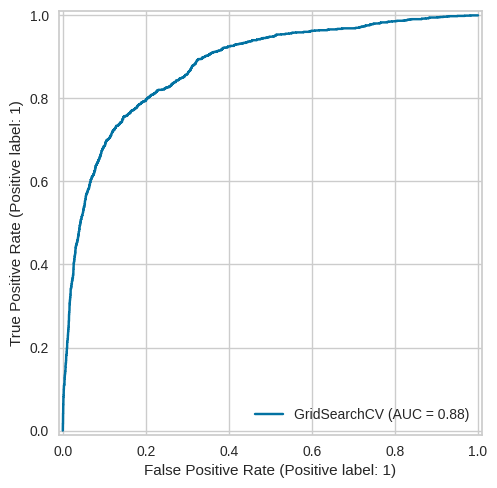

In [134]:

RocCurveDisplay.from_estimator(svm_model_grid, X_test, y_test);

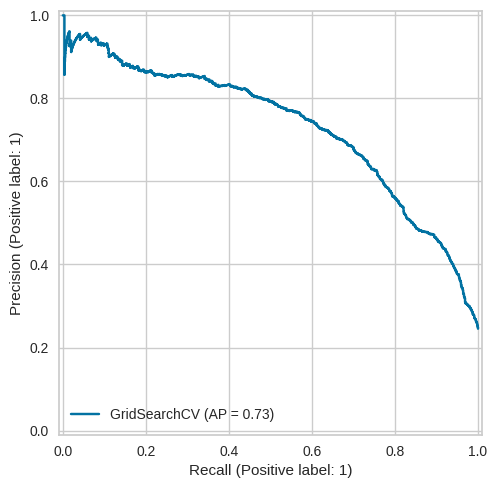

In [135]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);


# Compare Models Performance

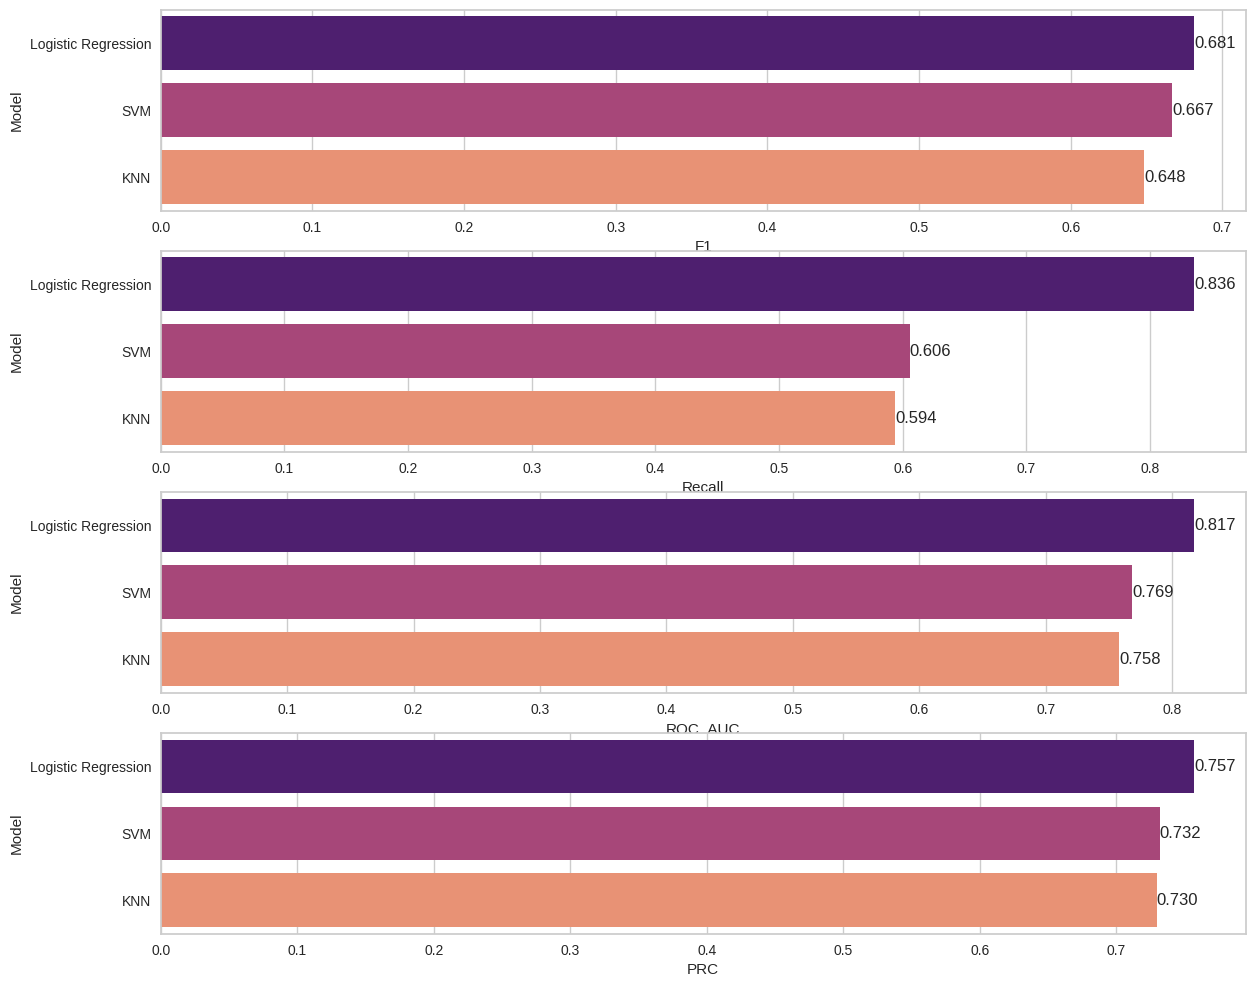

In [136]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM"],
                        "F1": [log_f1, knn_f1, svm_f1 ],
                        "Recall": [log_recall, knn_recall, svm_recall ],
                        "ROC_AUC": [log_auc, knn_auc, svm_auc],
                         "PRC"   : [log_prc, knn_prc, svm_prc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,12))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="magma")
labels(ax)

plt.show()

# Final Model and Model Deployment

In [149]:
df.head(1)

age workclass education  education.num marital.status      occupation  \
0  90.0   Private   HS-grad            9.0        Widowed  Prof-specialty   

    relationship   race     sex  hours.per.week native.country  income  \
0  Not-in-family  White  Female            40.0  United-States       0   

  capital_diff  
0          low

In [137]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10)

final_pipe_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X, y)

In [144]:
import pickle
pickle.dump(final_pipe_model, open("final_pipe_model", "wb"))

In [145]:

new_model = pickle.load(open("final_pipe_model", "rb"))
new_model

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['workclass',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native.country',
                                                                          'marital.status']),
                                                                        ('ordin...
                                                                                                     'Bachelors',
                                                                                                     'Masters',
                                                                                                     'Prof-school',
                                                                                                     'Doctorate'],
                                                                                                    ['low',
                                                                                                     'high']]),
                                                                         ['education',
                                                                          'capital_diff'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.03],
                          'logistic__class_weight': ['balanced'],
                          'logistic__max_iter': [1000],
                          'logistic__penalty': ['l1'],
                          'logistic__solver': ['saga']}],
             return_train_score=True, scoring='f1')


# Prediction

In [150]:
my_dict= {
    'age': [44.0, 32.0, 30.0],
    'workclass': ['Federal-gov', 'Private', 'Self-emp-not-inc'],
    'education': ['Bachelors', 'Bachelors', 'Some-college'],
    'education.num': [13.0, 13.0, 10.0],
    'marital.status': ['Widowed', 'Married', 'NotMarried'],
    'occupation': ['Tech-support', 'Sales', 'Sales'],
    'relationship': ['Not-in-family', 'Husband', 'Other-relative'],
    'race': ['White', 'White', 'Others'],
    'sex': ['Male', 'Male', 'Male'],
    'hours.per.week': [40.0, 40.0, 40.0],
    'native.country': ['United-States', 'United-States', 'Other'],
    'capital_diff': ['low', 'low', 'low']
}

In [151]:
sample = pd.DataFrame(my_dict)
sample

age         workclass     education  education.num marital.status  \
0  44.0       Federal-gov     Bachelors           13.0        Widowed   
1  32.0           Private     Bachelors           13.0        Married   
2  30.0  Self-emp-not-inc  Some-college           10.0     NotMarried   

     occupation    relationship    race   sex  hours.per.week native.country  \
0  Tech-support   Not-in-family   White  Male            40.0  United-States   
1         Sales         Husband   White  Male            40.0  United-States   
2         Sales  Other-relative  Others  Male            40.0          Other   

  capital_diff  
0          low  
1          low  
2          low

In [152]:
new_model.predict(sample)

array([1, 1, 0])

In [153]:
new_model.decision_function(sample)

array([ 0.27369739,  1.16079392, -2.17912462])

# Conclusion

In [ ]:

#   Logistic grid      recall: 83,  f1 :  0.68   prc=0.75


*   In an unbalanced dataset, F1-Score and Recall metrics are indeed very important. These metrics play a critical role in evaluating model performance in unbalanced datasets, as they measure the model's ability to correctly predict the minority class.

**When prioritizing F1-Score and Recall:**

* The Logistic Regression model stands out with a Recall of 0.83 and an F1-Score of 0.68. This model demonstrates balanced performance across the classes in the unbalanced dataset, effectively capturing the minority class while also performing well in overall classification.

*  The KNN Model, although it performs well in terms of accuracy, lags behind Logistic Regression with a Recall of 0.59 and an F1-Score of 0.64. This indicates that the model is less effective at capturing the minority class in the unbalanced dataset.


*  The SVM Model, despite excelling in accuracy, also falls behind Logistic Regression in these two metrics with a Recall of 0.60 and an F1-Score of 0.66. It is evident that SVM is not sufficiently successful in capturing the minority class.


* **Based on these results, I can say that the Logistic Regression model offers the best performance in terms of Recall and F1-Score for unbalanced datasets and should therefore be preferred. Especially in unbalanced datasets, it is critical that the model correctly identifies the minority class, making Logistic Regression the most suitable choice.**

#                **🙂THANK YOU🙂**

---

